## We're having a look at Electricity Generation and Consumption Data effectively from 1949 to mid 2021 for the US

#### Some of the areas we'll focus on while performing EDA:

1. Yearly total generation
2. Average monthly generation avg(each year)
3. Sector wise yearly generation
4. Sector wise monthly generation avg(each year)
5. Compare generation sector wise
6. Yearly Imports
7. Yearly Exports
8. Yearly Net Imports
9. Yearly Transmission and Distribution Losses Unaccounted for
10. Yearly Retail Sales
11. Yearly Direct Use
12. Yearly End use total

13. Which years showed abnormal generation/consumption?
14. Relation to the Oil Crisis
15. i) Compare 2021 Feb Electricity crisis
      ii) Try to get logical answer from population comparision
16. Relate to Industrialization and Commercialization

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Getting Data

In [2]:
df = pd.read_csv('MER_T07_01.csv')       #Importing data. Got the data from 'https://www.eia.gov/electricity/data.php' from the list professor provided

In [3]:
df.info()      #Having a look at what we're dealing with

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7183 entries, 0 to 7182
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           7183 non-null   object
 1   YYYYMM        7183 non-null   int64 
 2   Value         7183 non-null   object
 3   Column_Order  7183 non-null   int64 
 4   Description   7183 non-null   object
 5   Unit          7183 non-null   object
dtypes: int64(2), object(4)
memory usage: 336.8+ KB


In [4]:
df.head()

MSN  YYYYMM    Value  Column_Order  \
0  ELEGPUS  194913    291.1             1   
1  ELEGPUS  195013  329.141             1   
2  ELEGPUS  195113  370.673             1   
3  ELEGPUS  195213  399.224             1   
4  ELEGPUS  195313  442.665             1   

                                         Description                   Unit  
0  Electricity Net Generation, Electric Power Sector  Billion Kilowatthours  
1  Electricity Net Generation, Electric Power Sector  Billion Kilowatthours  
2  Electricity Net Generation, Electric Power Sector  Billion Kilowatthours  
3  Electricity Net Generation, Electric Power Sector  Billion Kilowatthours  
4  Electricity Net Generation, Electric Power Sector  Billion Kilowatthours

In [5]:
df['MSN'].value_counts()     #What all is present in MSN

ELIMPUS    653
ELC5PUS    653
ELDUPUS    653
ELEGPUS    653
ELUNPUS    653
ELETPUS    653
ESTCPUS    653
ELNIPUS    653
ELI5PUS    653
ELTCPUS    653
ELEXPUS    653
Name: MSN, dtype: int64

In [6]:
df['Column_Order'].value_counts()        #What all is present in Column_Order. There are 11 different categories

11    653
7     653
3     653
10    653
6     653
2     653
9     653
5     653
1     653
8     653
4     653
Name: Column_Order, dtype: int64

In [7]:
df['Description'].value_counts()        #What are the names of the categories

Electricity Net Generation, Industrial Sector               653
Electricity Net Generation, Total                           653
Transmission and Distribution Losses and Unaccounted for    653
Electricity Net Imports                                     653
Electricity Retail Sales, Total                             653
Electricity Exports                                         653
Electricity Imports                                         653
Electricity Net Generation, Commercial Sector               653
Electricity Net Generation, Electric Power Sector           653
Electricity Direct Use                                      653
Electricity End Use, Total                                  653
Name: Description, dtype: int64

In [8]:
df['Unit'].value_counts()         #Checking if there is only one unit

Billion Kilowatthours    7183
Name: Unit, dtype: int64

In [9]:
df['Value'].value_counts()             #Checking for 'Not Available'

Not Available    464
0.281             19
0.236             18
0.931             11
1.431             11
                ... 
4.028              1
1860.71            1
24.911             1
356.152            1
3.527              1
Name: Value, Length: 5594, dtype: int64

## Cleaning Data

In [10]:
df_na = df.loc[df['Value'] == 'Not Available']         #Separating the 'Not Available' values
df_na
df_na.reset_index()

index      MSN  YYYYMM          Value  Column_Order  \
0      653  ELC5PUS  194913  Not Available             2   
1      654  ELC5PUS  195013  Not Available             2   
2      655  ELC5PUS  195113  Not Available             2   
3      656  ELC5PUS  195213  Not Available             2   
4      657  ELC5PUS  195313  Not Available             2   
..     ...      ...     ...            ...           ...   
459   6104  ELDUPUS  198809  Not Available            10   
460   6105  ELDUPUS  198810  Not Available            10   
461   6106  ELDUPUS  198811  Not Available            10   
462   6107  ELDUPUS  198812  Not Available            10   
463   6108  ELDUPUS  198813  Not Available            10   

                                       Description                   Unit  
0    Electricity Net Generation, Commercial Sector  Billion Kilowatthours  
1    Electricity Net Generation, Commercial Sector  Billion Kilowatthours  
2    Electricity Net Generation, Commercial Sector  Billion Kilowatthours  
3    Electricity Net Generation, Commercial Sector  Billion Kilowatthours  
4    Electricity Net Generation, Commercial Sector  Billion Kilowatthours  
..                                             ...                    ...  
459                         Electricity Direct Use  Billion Kilowatthours  
460                         Electricity Direct Use  Billion Kilowatthours  
461                         Electricity Direct Use  Billion Kilowatthours  
462                         Electricity Direct Use  Billion Kilowatthours  
463                         Electricity Direct Use  Billion Kilowatthours  

[464 rows x 7 columns]

In [11]:
df_na.head(464)

MSN  YYYYMM          Value  Column_Order  \
653   ELC5PUS  194913  Not Available             2   
654   ELC5PUS  195013  Not Available             2   
655   ELC5PUS  195113  Not Available             2   
656   ELC5PUS  195213  Not Available             2   
657   ELC5PUS  195313  Not Available             2   
...       ...     ...            ...           ...   
6104  ELDUPUS  198809  Not Available            10   
6105  ELDUPUS  198810  Not Available            10   
6106  ELDUPUS  198811  Not Available            10   
6107  ELDUPUS  198812  Not Available            10   
6108  ELDUPUS  198813  Not Available            10   

                                        Description                   Unit  
653   Electricity Net Generation, Commercial Sector  Billion Kilowatthours  
654   Electricity Net Generation, Commercial Sector  Billion Kilowatthours  
655   Electricity Net Generation, Commercial Sector  Billion Kilowatthours  
656   Electricity Net Generation, Commercial Sector  Billion Kilowatthours  
657   Electricity Net Generation, Commercial Sector  Billion Kilowatthours  
...                                             ...                    ...  
6104                         Electricity Direct Use  Billion Kilowatthours  
6105                         Electricity Direct Use  Billion Kilowatthours  
6106                         Electricity Direct Use  Billion Kilowatthours  
6107                         Electricity Direct Use  Billion Kilowatthours  
6108                         Electricity Direct Use  Billion Kilowatthours  

[464 rows x 6 columns]

In [12]:
pd.set_option('display.max_rows', None)   #https://thispointer.com/python-pandas-how-to-display-full-dataframe-i-e-print-all-rows-columns-without-truncation/

In [13]:
# No Electricity Net Generation in Commercial Sector from 1949 to 1988 - Maybe due to lack of commercialization
# No Electricity Direct Use from 1949 to 1988 - Doesn't make any sense
# Any possible reasons?

In [14]:
df.drop(df[df.Value == 'Not Available'].index, inplace=True)        #Dropping 'Not Available' rows

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6719 entries, 0 to 7182
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           6719 non-null   object
 1   YYYYMM        6719 non-null   int64 
 2   Value         6719 non-null   object
 3   Column_Order  6719 non-null   int64 
 4   Description   6719 non-null   object
 5   Unit          6719 non-null   object
dtypes: int64(2), object(4)
memory usage: 367.4+ KB


In [16]:
#df['YYYYMM'] = pd.to_datetime(df['YYYYMM'], format='%Y%m')     #https://datatofish.com/integers-datetime-pandas-dataframe/
#I'm getting this error because of the 13th month in the data. Trying to convert int object to datetime

In [17]:
df['YYYYMM'] = df['YYYYMM'].apply(str)        #Since YYYYMM is int, we need to convert it to str first to perform string manipulations

In [18]:
total_items = []                           #Getting all the '13th' month values which actually is total for that year
for item in df['YYYYMM']:
    if item[4:] == '13':
        print(item)
        total_items.append(item)

194913
195013
195113
195213
195313
195413
195513
195613
195713
195813
195913
196013
196113
196213
196313
196413
196513
196613
196713
196813
196913
197013
197113
197213
197313
197413
197513
197613
197713
197813
197913
198013
198113
198213
198313
198413
198513
198613
198713
198813
198913
199013
199113
199213
199313
199413
199513
199613
199713
199813
199913
200013
200113
200213
200313
200413
200513
200613
200713
200813
200913
201013
201113
201213
201313
201413
201513
201613
201713
201813
201913
202013
198913
199013
199113
199213
199313
199413
199513
199613
199713
199813
199913
200013
200113
200213
200313
200413
200513
200613
200713
200813
200913
201013
201113
201213
201313
201413
201513
201613
201713
201813
201913
202013
194913
195013
195113
195213
195313
195413
195513
195613
195713
195813
195913
196013
196113
196213
196313
196413
196513
196613
196713
196813
196913
197013
197113
197213
197313
197413
197513
197613
197713
197813
197913
198013
198113
198213
198313
198413
198513
198613
198713

In [19]:
total_rows = []                           #Getting the whole row which has 13th month and appending to list
for row in df.iterrows():
    if row[1][1] in total_items:
        total_rows.append(row[1])

In [20]:
total_rows

[MSN                                                       ELEGPUS
 YYYYMM                                                     194913
 Value                                                       291.1
 Column_Order                                                    1
 Description     Electricity Net Generation, Electric Power Sector
 Unit                                        Billion Kilowatthours
 Name: 0, dtype: object,
 MSN                                                       ELEGPUS
 YYYYMM                                                     195013
 Value                                                     329.141
 Column_Order                                                    1
 Description     Electricity Net Generation, Electric Power Sector
 Unit                                        Billion Kilowatthours
 Name: 1, dtype: object,
 MSN                                                       ELEGPUS
 YYYYMM                                                     195113
 Value      

In [21]:
df_totals = pd.DataFrame(total_rows)              #Converting 13th month rows to a separate dataframe for further computation
df_totals
df_totals.reset_index()

index      MSN  YYYYMM     Value  Column_Order  \
0        0  ELEGPUS  194913     291.1             1   
1        1  ELEGPUS  195013   329.141             1   
2        2  ELEGPUS  195113   370.673             1   
3        3  ELEGPUS  195213   399.224             1   
4        4  ELEGPUS  195313   442.665             1   
5        5  ELEGPUS  195413   471.686             1   
6        6  ELEGPUS  195513   547.038             1   
7        7  ELEGPUS  195613   600.668             1   
8        8  ELEGPUS  195713   631.517             1   
9        9  ELEGPUS  195813   645.098             1   
10      10  ELEGPUS  195913   710.006             1   
11      11  ELEGPUS  196013   755.549             1   
12      12  ELEGPUS  196113    793.76             1   
13      13  ELEGPUS  196213   854.535             1   
14      14  ELEGPUS  196313   916.793             1   
15      15  ELEGPUS  196413    983.99             1   
16      16  ELEGPUS  196513  1055.252             1   
17      17  ELEGPUS  196613   1144.35             1   
18      18  ELEGPUS  196713  1214.365             1   
19      19  ELEGPUS  196813  1329.443             1   
20      20  ELEGPUS  196913  1442.182             1   
21      21  ELEGPUS  197013  1531.868             1   
22      22  ELEGPUS  197113  1612.633             1   
23      23  ELEGPUS  197213  1749.662             1   
24      36  ELEGPUS  197313   1860.71             1   
25      49  ELEGPUS  197413   1867.14             1   
26      62  ELEGPUS  197513  1917.649             1   
27      75  ELEGPUS  197613  2037.696             1   
28      88  ELEGPUS  197713  2124.323             1   
29     101  ELEGPUS  197813  2206.331             1   
30     114  ELEGPUS  197913  2247.372             1   
31     127  ELEGPUS  198013  2286.439             1   
32     140  ELEGPUS  198113  2294.812             1   
33     153  ELEGPUS  198213  2241.211             1   
34     166  ELEGPUS  198313  2310.285             1   
35     179  ELEGPUS  198413  2416.304             1   
36     192  ELEGPUS  198513  2469.841             1   
37     205  ELEGPUS  198613   2487.31             1   
38     218  ELEGPUS  198713  2572.127             1   
39     231  ELEGPUS  198813   2704.25             1   
40     244  ELEGPUS  198913  2848.227             1   
41     257  ELEGPUS  199013  2901.322             1   
42     270  ELEGPUS  199113  2935.561             1   
43     283  ELEGPUS  199213  2934.374             1   
44     296  ELEGPUS  199313  3043.897             1   
45     309  ELEGPUS  199413  3088.725             1   
46     322  ELEGPUS  199513   3194.23             1   
47     335  ELEGPUS  199613  3284.141             1   
48     348  ELEGPUS  199713  3329.375             1   
49     361  ELEGPUS  199813  3457.416             1   
50     374  ELEGPUS  199913  3529.982             1   
51     387  ELEGPUS  200013  3637.529             1   
52     400  ELEGPUS  200113  3580.053             1   
53     413  ELEGPUS  200213  3698.458             1   
54     426  ELEGPUS  200313  3721.159             1   
55     439  ELEGPUS  200413   3808.36             1   
56     452  ELEGPUS  200513  3902.192             1   
57     465  ELEGPUS  200613  3908.077             1   
58     478  ELEGPUS  200713  4005.343             1   
59     491  ELEGPUS  200813  3974.349             1   
60     504  ELEGPUS  200913  3809.837             1   
61     517  ELEGPUS  201013  3972.386             1   
62     530  ELEGPUS  201113  3948.186             1   
63     543  ELEGPUS  201213  3890.358             1   
64     556  ELEGPUS  201313  3903.715             1   
65     569  ELEGPUS  201413  3937.003             1   
66     582  ELEGPUS  201513  3919.294             1   
67     595  ELEGPUS  201613  3918.078             1   
68     608  ELEGPUS  201713  3877.453             1   
69     621  ELEGPUS  201813  4018.167             1   
70     634  ELEGPUS  201913  3965.629             1   
71     647  ELEGPUS  202013  3852.634        

In [22]:
df["YYYYMM"].replace(r"\d{4}13", "NA", regex=True, inplace=True)     #Using regex to replace the 13th month values to NA so we can just search and drop NA values later

In [23]:
df.drop(df[df.YYYYMM == 'NA'].index, inplace=True)        #Dropping NA in YYYYMM observations

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6007 entries, 24 to 7182
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           6007 non-null   object
 1   YYYYMM        6007 non-null   object
 2   Value         6007 non-null   object
 3   Column_Order  6007 non-null   int64 
 4   Description   6007 non-null   object
 5   Unit          6007 non-null   object
dtypes: int64(1), object(5)
memory usage: 328.5+ KB


In [25]:
df.head()

MSN  YYYYMM    Value  Column_Order  \
24  ELEGPUS  197301  159.913             1   
25  ELEGPUS  197302  143.257             1   
26  ELEGPUS  197303  147.847             1   
27  ELEGPUS  197304  139.292             1   
28  ELEGPUS  197305  147.088             1   

                                          Description                   Unit  
24  Electricity Net Generation, Electric Power Sector  Billion Kilowatthours  
25  Electricity Net Generation, Electric Power Sector  Billion Kilowatthours  
26  Electricity Net Generation, Electric Power Sector  Billion Kilowatthours  
27  Electricity Net Generation, Electric Power Sector  Billion Kilowatthours  
28  Electricity Net Generation, Electric Power Sector  Billion Kilowatthours

In [26]:
column_categories = list(df['Column_Order'].value_counts().index)    #Checking the Column_Order values to make sure we didn't lose anything 
column_categories

[11, 7, 3, 6, 9, 5, 1, 8, 4, 10, 2]

In [27]:
df_eg_eps = df.loc[df['Column_Order'] == 1]       #Creating a new dataframe which ONLY consists of 'Electricity Net Generation, Electric Power Sector' just to make analysis easy later
df_eg_eps
df_eg_eps.reset_index()

index      MSN  YYYYMM    Value  Column_Order  \
0       24  ELEGPUS  197301  159.913             1   
1       25  ELEGPUS  197302  143.257             1   
2       26  ELEGPUS  197303  147.847             1   
3       27  ELEGPUS  197304  139.292             1   
4       28  ELEGPUS  197305  147.088             1   
5       29  ELEGPUS  197306  160.945             1   
6       30  ELEGPUS  197307  173.467             1   
7       31  ELEGPUS  197308  177.109             1   
8       32  ELEGPUS  197309  156.651             1   
9       33  ELEGPUS  197310  153.954             1   
10      34  ELEGPUS  197311  147.881             1   
11      35  ELEGPUS  197312  153.307             1   
12      37  ELEGPUS  197401  157.254             1   
13      38  ELEGPUS  197402  142.474             1   
14      39  ELEGPUS  197403  150.048             1   
15      40  ELEGPUS  197404  142.021             1   
16      41  ELEGPUS  197405  153.513             1   
17      42  ELEGPUS  197406  156.161             1   
18      43  ELEGPUS  197407  177.992             1   
19      44  ELEGPUS  197408  173.879             1   
20      45  ELEGPUS  197409  152.239             1   
21      46  ELEGPUS  197410  151.978             1   
22      47  ELEGPUS  197411  149.844             1   
23      48  ELEGPUS  197412  159.737             1   
24      50  ELEGPUS  197501  164.325             1   
25      51  ELEGPUS  197502  147.084             1   
26      52  ELEGPUS  197503  155.481             1   
27      53  ELEGPUS  197504  146.217             1   
28      54  ELEGPUS  197505  153.231             1   
29      55  ELEGPUS  197506  162.442             1   
30      56  ELEGPUS  197507  176.816             1   
31      57  ELEGPUS  197508  179.714             1   
32      58  ELEGPUS  197509  155.223             1   
33      59  ELEGPUS  197510  154.949             1   
34      60  ELEGPUS  197511  152.795             1   
35      61  ELEGPUS  197512  169.372             1   
36      63  ELEGPUS  197601  178.329             1   
37      64  ELEGPUS  197602  156.684             1   
38      65  ELEGPUS  197603  164.174             1   
39      66  ELEGPUS  197604  153.167             1   
40      67  ELEGPUS  197605   157.37             1   
41      68  ELEGPUS  197606  173.392             1   
42      69  ELEGPUS  197607  186.434             1   
43      70  ELEGPUS  197608  186.403             1   
44      71  ELEGPUS  197609  165.035             1   
45      72  ELEGPUS  197610  163.746             1   
46      73  ELEGPUS  197611  169.085             1   
47      74  ELEGPUS  197612  183.877             1   
48      76  ELEGPUS  197701  196.372             1   
49      77  ELEGPUS  197702  162.734             1   
50      78  ELEGPUS  197703  169.157             1   
51      79  ELEGPUS  197704  156.853             1   
52      80  ELEGPUS  197705  169.332             1   
53      81  ELEGPUS  197706  180.787             1   
54      82  ELEGPUS  197707   198.93             1   
55      83  ELEGPUS  197708  196.126             1   
56      84  ELEGPUS  197709  176.265             1   
57      85  ELEGPUS  197710  166.402             1   
58      86  ELEGPUS  197711  167.099             1   
59      87  ELEGPUS  197712  184.267             1   
60      89  ELEGPUS  197801  197.835             1   
61      90  ELEGPUS  197802  173.504             1   
62      91  ELEGPUS  197803  173.193             1   
63      92  ELEGPUS  197804  159.738             1   
64      93  ELEGPUS  197805  175.236             1   
65      94  ELEGPUS  197806  188.312             1   
66      95  ELEGPUS  197807  202.682             1   
67      96  ELEGPUS  197808  206.418             1   
68      97  ELEGPUS  197809  185.572             1   
69      98  ELEGPUS  197810  175.802             1   
70      99  ELEGPUS  197811  176.172             1   
71     100  ELEGPUS  197812  191.865             1   
72     102  ELEGPUS  197901  209.692             1   
73     10

In [28]:
df_eg_cs = df.loc[df['Column_Order'] == 2]      #Creating a new dataframe which ONLY consists of 'Electricity Net Generation, Commercial Sector' just to make analysis easy later
df_eg_cs
df_eg_cs.reset_index()

index      MSN  YYYYMM  Value  Column_Order  \
0      885  ELC5PUS  198901  0.284             2   
1      886  ELC5PUS  198902  0.308             2   
2      887  ELC5PUS  198903  0.325             2   
3      888  ELC5PUS  198904  0.328             2   
4      889  ELC5PUS  198905   0.35             2   
5      890  ELC5PUS  198906  0.372             2   
6      891  ELC5PUS  198907   0.43             2   
7      892  ELC5PUS  198908   0.42             2   
8      893  ELC5PUS  198909  0.381             2   
9      894  ELC5PUS  198910  0.369             2   
10     895  ELC5PUS  198911  0.328             2   
11     896  ELC5PUS  198912  0.356             2   
12     898  ELC5PUS  199001  0.393             2   
13     899  ELC5PUS  199002  0.353             2   
14     900  ELC5PUS  199003  0.438             2   
15     901  ELC5PUS  199004  0.445             2   
16     902  ELC5PUS  199005  0.489             2   
17     903  ELC5PUS  199006  0.583             2   
18     904  ELC5PUS  199007  0.618             2   
19     905  ELC5PUS  199008  0.634             2   
20     906  ELC5PUS  199009  0.558             2   
21     907  ELC5PUS  199010  0.506             2   
22     908  ELC5PUS  199011  0.408             2   
23     909  ELC5PUS  199012  0.411             2   
24     911  ELC5PUS  199101  0.414             2   
25     912  ELC5PUS  199102  0.352             2   
26     913  ELC5PUS  199103  0.423             2   
27     914  ELC5PUS  199104   0.44             2   
28     915  ELC5PUS  199105    0.5             2   
29     916  ELC5PUS  199106  0.511             2   
30     917  ELC5PUS  199107  0.592             2   
31     918  ELC5PUS  199108  0.602             2   
32     919  ELC5PUS  199109  0.506             2   
33     920  ELC5PUS  199110  0.492             2   
34     921  ELC5PUS  199111  0.429             2   
35     922  ELC5PUS  199112  0.397             2   
36     924  ELC5PUS  199201  0.456             2   
37     925  ELC5PUS  199202  0.433             2   
38     926  ELC5PUS  199203  0.489             2   
39     927  ELC5PUS  199204  0.496             2   
40     928  ELC5PUS  199205   0.52             2   
41     929  ELC5PUS  199206  0.565             2   
42     930  ELC5PUS  199207  0.683             2   
43     931  ELC5PUS  199208  0.628             2   
44     932  ELC5PUS  199209   0.58             2   
45     933  ELC5PUS  199210  0.489             2   
46     934  ELC5PUS  199211  0.437             2   
47     935  ELC5PUS  199212  0.451             2   
48     937  ELC5PUS  199301  0.503             2   
49     938  ELC5PUS  199302   0.47             2   
50     939  ELC5PUS  199303  0.555             2   
51     940  ELC5PUS  199304  0.469             2   
52     941  ELC5PUS  199305  0.466             2   
53     942  ELC5PUS  199306  0.631             2   
54     943  ELC5PUS  199307  0.777             2   
55     944  ELC5PUS  199308  0.811             2   
56     945  ELC5PUS  199309  0.645             2   
57     946  ELC5PUS  199310    0.6             2   
58     947  ELC5PUS  199311  0.554             2   
59     948  ELC5PUS  199312   0.52             2   
60     950  ELC5PUS  199401  0.533             2   
61     951  ELC5PUS  199402  0.461             2   
62     952  ELC5PUS  199403  0.533             2   
63     953  ELC5PUS  199404  0.549             2   
64     954  ELC5PUS  199405  0.575             2   
65     955  ELC5PUS  199406  0.768             2   
66     956  ELC5PUS  199407  0.833             2   
67     957  ELC5PUS  199408  0.854             2   
68     958  ELC5PUS  199409  0.687             2   
69     959  ELC5PUS  199410  0.654             2   
70     960  ELC5PUS  199411  0.595             2   
71     961  ELC5PUS  199412  0.576             2   
72     963  ELC5PUS  199501  0.572             2   
73     964  ELC5PUS  199502  0.515             2   
74     965  ELC5PUS  199503  0.618             2   
75     966  ELC5PUS  199504  0.619             2   
7

In [29]:
df_eg_is = df.loc[df['Column_Order'] == 3]        #Creating a new dataframe which ONLY consists of 'Electricity Net Generation, Industrial Sector' just to make analysis easy later
df_eg_is
df_eg_is.reset_index()

index      MSN  YYYYMM   Value  Column_Order  \
0     1330  ELI5PUS  197301   0.305             3   
1     1331  ELI5PUS  197302   0.282             3   
2     1332  ELI5PUS  197303   0.312             3   
3     1333  ELI5PUS  197304   0.298             3   
4     1334  ELI5PUS  197305   0.307             3   
5     1335  ELI5PUS  197306   0.298             3   
6     1336  ELI5PUS  197307   0.266             3   
7     1337  ELI5PUS  197308   0.257             3   
8     1338  ELI5PUS  197309   0.224             3   
9     1339  ELI5PUS  197310   0.244             3   
10    1340  ELI5PUS  197311   0.257             3   
11    1341  ELI5PUS  197312   0.298             3   
12    1343  ELI5PUS  197401   0.301             3   
13    1344  ELI5PUS  197402   0.274             3   
14    1345  ELI5PUS  197403   0.294             3   
15    1346  ELI5PUS  197404   0.291             3   
16    1347  ELI5PUS  197405     0.3             3   
17    1348  ELI5PUS  197406   0.279             3   
18    1349  ELI5PUS  197407   0.255             3   
19    1350  ELI5PUS  197408    0.24             3   
20    1351  ELI5PUS  197409   0.229             3   
21    1352  ELI5PUS  197410   0.217             3   
22    1353  ELI5PUS  197411   0.227             3   
23    1354  ELI5PUS  197412   0.272             3   
24    1356  ELI5PUS  197501   0.298             3   
25    1357  ELI5PUS  197502   0.265             3   
26    1358  ELI5PUS  197503   0.279             3   
27    1359  ELI5PUS  197504   0.278             3   
28    1360  ELI5PUS  197505     0.3             3   
29    1361  ELI5PUS  197506   0.275             3   
30    1362  ELI5PUS  197507   0.241             3   
31    1363  ELI5PUS  197508   0.217             3   
32    1364  ELI5PUS  197509   0.218             3   
33    1365  ELI5PUS  197510   0.239             3   
34    1366  ELI5PUS  197511    0.24             3   
35    1367  ELI5PUS  197512   0.256             3   
36    1369  ELI5PUS  197601    0.28             3   
37    1370  ELI5PUS  197602   0.282             3   
38    1371  ELI5PUS  197603   0.292             3   
39    1372  ELI5PUS  197604     0.3             3   
40    1373  ELI5PUS  197605   0.294             3   
41    1374  ELI5PUS  197606   0.282             3   
42    1375  ELI5PUS  197607   0.257             3   
43    1376  ELI5PUS  197608   0.235             3   
44    1377  ELI5PUS  197609   0.202             3   
45    1378  ELI5PUS  197610   0.263             3   
46    1379  ELI5PUS  197611   0.262             3   
47    1380  ELI5PUS  197612   0.267             3   
48    1382  ELI5PUS  197701   0.293             3   
49    1383  ELI5PUS  197702   0.215             3   
50    1384  ELI5PUS  197703   0.281             3   
51    1385  ELI5PUS  197704   0.264             3   
52    1386  ELI5PUS  197705   0.265             3   
53    1387  ELI5PUS  197706   0.244             3   
54    1388  ELI5PUS  197707   0.238             3   
55    1389  ELI5PUS  197708   0.237             3   
56    1390  ELI5PUS  197709   0.233             3   
57    1391  ELI5PUS  197710   0.244             3   
58    1392  ELI5PUS  197711   0.289             3   
59    1393  ELI5PUS  197712   0.322             3   
60    1395  ELI5PUS  197801   0.272             3   
61    1396  ELI5PUS  197802   0.241             3   
62    1397  ELI5PUS  197803   0.268             3   
63    1398  ELI5PUS  197804   0.275             3   
64    1399  ELI5PUS  197805   0.312             3   
65    1400  ELI5PUS  197806   0.273             3   
66    1401  ELI5PUS  197807   0.266             3   
67    1402  ELI5PUS  197808   0.241             3   
68    1403  ELI5PUS  197809    0.23             3   
69    1404  ELI5PUS  197810   0.212             3   
70    1405  ELI5PUS  197811   0.217             3   
71    1406  ELI5PUS  197812    0.24             3   
72    1408  ELI5PUS  197901   0.295             3   
73    1409  ELI5PUS  197902    0.25             3   
74    1410  ELI5PUS  197903   

In [30]:
df_eg_tot = df.loc[df['Column_Order'] == 4]         #Creating a new dataframe which ONLY consists of 'Electricity Net Generation, Total' just to make analysis easy later
df_eg_tot
df_eg_tot.reset_index()

index      MSN  YYYYMM    Value  Column_Order  \
0     1983  ELETPUS  197301  160.218             4   
1     1984  ELETPUS  197302  143.539             4   
2     1985  ELETPUS  197303  148.158             4   
3     1986  ELETPUS  197304  139.589             4   
4     1987  ELETPUS  197305  147.395             4   
5     1988  ELETPUS  197306  161.244             4   
6     1989  ELETPUS  197307  173.733             4   
7     1990  ELETPUS  197308  177.365             4   
8     1991  ELETPUS  197309  156.875             4   
9     1992  ELETPUS  197310  154.197             4   
10    1993  ELETPUS  197311  148.138             4   
11    1994  ELETPUS  197312  153.605             4   
12    1996  ELETPUS  197401  157.555             4   
13    1997  ELETPUS  197402  142.748             4   
14    1998  ELETPUS  197403  150.342             4   
15    1999  ELETPUS  197404  142.312             4   
16    2000  ELETPUS  197405  153.813             4   
17    2001  ELETPUS  197406   156.44             4   
18    2002  ELETPUS  197407  178.247             4   
19    2003  ELETPUS  197408  174.119             4   
20    2004  ELETPUS  197409  152.467             4   
21    2005  ELETPUS  197410  152.196             4   
22    2006  ELETPUS  197411  150.071             4   
23    2007  ELETPUS  197412  160.009             4   
24    2009  ELETPUS  197501  164.623             4   
25    2010  ELETPUS  197502  147.349             4   
26    2011  ELETPUS  197503   155.76             4   
27    2012  ELETPUS  197504  146.495             4   
28    2013  ELETPUS  197505  153.531             4   
29    2014  ELETPUS  197506  162.717             4   
30    2015  ELETPUS  197507  177.057             4   
31    2016  ELETPUS  197508  179.931             4   
32    2017  ELETPUS  197509  155.441             4   
33    2018  ELETPUS  197510  155.188             4   
34    2019  ELETPUS  197511  153.035             4   
35    2020  ELETPUS  197512  169.628             4   
36    2022  ELETPUS  197601  178.609             4   
37    2023  ELETPUS  197602  156.966             4   
38    2024  ELETPUS  197603  164.467             4   
39    2025  ELETPUS  197604  153.467             4   
40    2026  ELETPUS  197605  157.664             4   
41    2027  ELETPUS  197606  173.674             4   
42    2028  ELETPUS  197607  186.691             4   
43    2029  ELETPUS  197608  186.639             4   
44    2030  ELETPUS  197609  165.237             4   
45    2031  ELETPUS  197610  164.009             4   
46    2032  ELETPUS  197611  169.346             4   
47    2033  ELETPUS  197612  184.144             4   
48    2035  ELETPUS  197701  196.665             4   
49    2036  ELETPUS  197702  162.949             4   
50    2037  ELETPUS  197703  169.437             4   
51    2038  ELETPUS  197704  157.117             4   
52    2039  ELETPUS  197705  169.596             4   
53    2040  ELETPUS  197706  181.031             4   
54    2041  ELETPUS  197707  199.168             4   
55    2042  ELETPUS  197708  196.363             4   
56    2043  ELETPUS  197709  176.498             4   
57    2044  ELETPUS  197710  166.645             4   
58    2045  ELETPUS  197711  167.388             4   
59    2046  ELETPUS  197712  184.589             4   
60    2048  ELETPUS  197801  198.108             4   
61    2049  ELETPUS  197802  173.746             4   
62    2050  ELETPUS  197803  173.461             4   
63    2051  ELETPUS  197804  160.013             4   
64    2052  ELETPUS  197805  175.549             4   
65    2053  ELETPUS  197806  188.585             4   
66    2054  ELETPUS  197807  202.947             4   
67    2055  ELETPUS  197808  206.659             4   
68    2056  ELETPUS  197809  185.802             4   
69    2057  ELETPUS  197810  176.013             4   
70    2058  ELETPUS  197811  176.389             4   
71    2059  ELETPUS  197812  192.105             4   
72    2061  ELETPUS  197901  209.987             4   
73    206

In [31]:
df_imports = df.loc[df['Column_Order'] == 5]       #Creating a new dataframe which ONLY consists of 'Electricity Imports' just to make analysis easy later
df_imports
df_imports.reset_index()

index      MSN  YYYYMM  Value  Column_Order          Description  \
0     2636  ELIMPUS  197301  1.431             5  Electricity Imports   
1     2637  ELIMPUS  197302  1.292             5  Electricity Imports   
2     2638  ELIMPUS  197303  1.431             5  Electricity Imports   
3     2639  ELIMPUS  197304  1.385             5  Electricity Imports   
4     2640  ELIMPUS  197305  1.431             5  Electricity Imports   
5     2641  ELIMPUS  197306  1.385             5  Electricity Imports   
6     2642  ELIMPUS  197307  1.431             5  Electricity Imports   
7     2643  ELIMPUS  197308  1.431             5  Electricity Imports   
8     2644  ELIMPUS  197309  1.385             5  Electricity Imports   
9     2645  ELIMPUS  197310  1.431             5  Electricity Imports   
10    2646  ELIMPUS  197311  1.385             5  Electricity Imports   
11    2647  ELIMPUS  197312  1.431             5  Electricity Imports   
12    2649  ELIMPUS  197401   1.31             5  Electricity Imports   
13    2650  ELIMPUS  197402  1.183             5  Electricity Imports   
14    2651  ELIMPUS  197403   1.31             5  Electricity Imports   
15    2652  ELIMPUS  197404  1.267             5  Electricity Imports   
16    2653  ELIMPUS  197405   1.31             5  Electricity Imports   
17    2654  ELIMPUS  197406  1.267             5  Electricity Imports   
18    2655  ELIMPUS  197407   1.31             5  Electricity Imports   
19    2656  ELIMPUS  197408   1.31             5  Electricity Imports   
20    2657  ELIMPUS  197409  1.267             5  Electricity Imports   
21    2658  ELIMPUS  197410   1.31             5  Electricity Imports   
22    2659  ELIMPUS  197411  1.267             5  Electricity Imports   
23    2660  ELIMPUS  197412   1.31             5  Electricity Imports   
24    2662  ELIMPUS  197501  0.957             5  Electricity Imports   
25    2663  ELIMPUS  197502  0.864             5  Electricity Imports   
26    2664  ELIMPUS  197503  0.957             5  Electricity Imports   
27    2665  ELIMPUS  197504  0.926             5  Electricity Imports   
28    2666  ELIMPUS  197505  0.957             5  Electricity Imports   
29    2667  ELIMPUS  197506  0.926             5  Electricity Imports   
30    2668  ELIMPUS  197507  0.957             5  Electricity Imports   
31    2669  ELIMPUS  197508  0.957             5  Electricity Imports   
32    2670  ELIMPUS  197509  0.926             5  Electricity Imports   
33    2671  ELIMPUS  197510  0.957             5  Electricity Imports   
34    2672  ELIMPUS  197511  0.926             5  Electricity Imports   
35    2673  ELIMPUS  197512  0.957             5  Electricity Imports   
36    2675  ELIMPUS  197601  0.931             5  Electricity Imports   
37    2676  ELIMPUS  197602  0.871             5  Electricity Imports   
38    2677  ELIMPUS  197603  0.931             5  Electricity Imports   
39    2678  ELIMPUS  197604  0.901             5  Electricity Imports   
40    2679  ELIMPUS  197605  0.931             5  Electricity Imports   
41    2680  ELIMPUS  197606  0.901             5  Electricity Imports   
42    2681  ELIMPUS  197607  0.931             5  Electricity Imports   
43    2682  ELIMPUS  197608  0.931             5  Electricity Imports   
44    2683  ELIMPUS  197609  0.901             5  Electricity Imports   
45    2684  ELIMPUS  197610  0.931             5  Electricity Imports   
46    2685  ELIMPUS  197611  0.901             5  Electricity Imports   
47    2686  ELIMPUS  197612  0.931             5  Electricity Imports   
48    2688  ELIMPUS  197701  1.712             5  Electricity Imports   
49    2689  ELIMPUS  197702  1.546             5  Electricity Imports   
50    2690  ELIMPUS  197703  1.712             5  Electricity Imports   
51    2691  ELIMPUS  197704  1.657             5  Electricity Imports   
52    2692  ELIMPUS  197705  1.712             5  Electricity Imports   
53    2693  ELIMPUS  197706  1.657             5  Electricity I

In [32]:
df_exports = df.loc[df['Column_Order'] == 6]         #Creating a new dataframe which ONLY consists of 'Electricity Exports' just to make analysis easy later
df_exports
df_exports.reset_index()

index      MSN  YYYYMM  Value  Column_Order          Description  \
0     3289  ELEXPUS  197301  0.218             6  Electricity Exports   
1     3290  ELEXPUS  197302  0.197             6  Electricity Exports   
2     3291  ELEXPUS  197303  0.218             6  Electricity Exports   
3     3292  ELEXPUS  197304  0.211             6  Electricity Exports   
4     3293  ELEXPUS  197305  0.218             6  Electricity Exports   
5     3294  ELEXPUS  197306  0.211             6  Electricity Exports   
6     3295  ELEXPUS  197307  0.218             6  Electricity Exports   
7     3296  ELEXPUS  197308  0.218             6  Electricity Exports   
8     3297  ELEXPUS  197309  0.211             6  Electricity Exports   
9     3298  ELEXPUS  197310  0.218             6  Electricity Exports   
10    3299  ELEXPUS  197311  0.211             6  Electricity Exports   
11    3300  ELEXPUS  197312  0.218             6  Electricity Exports   
12    3302  ELEXPUS  197401  0.232             6  Electricity Exports   
13    3303  ELEXPUS  197402  0.209             6  Electricity Exports   
14    3304  ELEXPUS  197403  0.232             6  Electricity Exports   
15    3305  ELEXPUS  197404  0.224             6  Electricity Exports   
16    3306  ELEXPUS  197405  0.232             6  Electricity Exports   
17    3307  ELEXPUS  197406  0.224             6  Electricity Exports   
18    3308  ELEXPUS  197407  0.232             6  Electricity Exports   
19    3309  ELEXPUS  197408  0.232             6  Electricity Exports   
20    3310  ELEXPUS  197409  0.224             6  Electricity Exports   
21    3311  ELEXPUS  197410  0.232             6  Electricity Exports   
22    3312  ELEXPUS  197411  0.224             6  Electricity Exports   
23    3313  ELEXPUS  197412  0.232             6  Electricity Exports   
24    3315  ELEXPUS  197501  0.432             6  Electricity Exports   
25    3316  ELEXPUS  197502   0.39             6  Electricity Exports   
26    3317  ELEXPUS  197503  0.432             6  Electricity Exports   
27    3318  ELEXPUS  197504  0.418             6  Electricity Exports   
28    3319  ELEXPUS  197505  0.432             6  Electricity Exports   
29    3320  ELEXPUS  197506  0.418             6  Electricity Exports   
30    3321  ELEXPUS  197507  0.432             6  Electricity Exports   
31    3322  ELEXPUS  197508  0.432             6  Electricity Exports   
32    3323  ELEXPUS  197509  0.418             6  Electricity Exports   
33    3324  ELEXPUS  197510  0.432             6  Electricity Exports   
34    3325  ELEXPUS  197511  0.418             6  Electricity Exports   
35    3326  ELEXPUS  197512  0.432             6  Electricity Exports   
36    3328  ELEXPUS  197601  0.201             6  Electricity Exports   
37    3329  ELEXPUS  197602  0.188             6  Electricity Exports   
38    3330  ELEXPUS  197603  0.201             6  Electricity Exports   
39    3331  ELEXPUS  197604  0.195             6  Electricity Exports   
40    3332  ELEXPUS  197605  0.201             6  Electricity Exports   
41    3333  ELEXPUS  197606  0.195             6  Electricity Exports   
42    3334  ELEXPUS  197607  0.201             6  Electricity Exports   
43    3335  ELEXPUS  197608  0.201             6  Electricity Exports   
44    3336  ELEXPUS  197609  0.195             6  Electricity Exports   
45    3337  ELEXPUS  197610  0.201             6  Electricity Exports   
46    3338  ELEXPUS  197611  0.195             6  Electricity Exports   
47    3339  ELEXPUS  197612  0.201             6  Electricity Exports   
48    3341  ELEXPUS  197701  0.233             6  Electricity Exports   
49    3342  ELEXPUS  197702   0.21             6  Electricity Exports   
50    3343  ELEXPUS  197703  0.233             6  Electricity Exports   
51    3344  ELEXPUS  197704  0.226             6  Electricity Exports   
52    3345  ELEXPUS  197705  0.233             6  Electricity Exports   
53    3346  ELEXPUS  197706  0.226             6  Electricity E

In [33]:
df_net_imports = df.loc[df['Column_Order'] == 7]         #Creating a new dataframe which ONLY consists of 'Electricity Net Imports' just to make analysis easy later
df_net_imports
df_net_imports.reset_index()

index      MSN  YYYYMM   Value  Column_Order              Description  \
0     3942  ELNIPUS  197301   1.213             7  Electricity Net Imports   
1     3943  ELNIPUS  197302   1.095             7  Electricity Net Imports   
2     3944  ELNIPUS  197303   1.213             7  Electricity Net Imports   
3     3945  ELNIPUS  197304   1.174             7  Electricity Net Imports   
4     3946  ELNIPUS  197305   1.213             7  Electricity Net Imports   
5     3947  ELNIPUS  197306   1.174             7  Electricity Net Imports   
6     3948  ELNIPUS  197307   1.213             7  Electricity Net Imports   
7     3949  ELNIPUS  197308   1.213             7  Electricity Net Imports   
8     3950  ELNIPUS  197309   1.174             7  Electricity Net Imports   
9     3951  ELNIPUS  197310   1.213             7  Electricity Net Imports   
10    3952  ELNIPUS  197311   1.174             7  Electricity Net Imports   
11    3953  ELNIPUS  197312   1.213             7  Electricity Net Imports   
12    3955  ELNIPUS  197401   1.078             7  Electricity Net Imports   
13    3956  ELNIPUS  197402   0.974             7  Electricity Net Imports   
14    3957  ELNIPUS  197403   1.078             7  Electricity Net Imports   
15    3958  ELNIPUS  197404   1.043             7  Electricity Net Imports   
16    3959  ELNIPUS  197405   1.078             7  Electricity Net Imports   
17    3960  ELNIPUS  197406   1.043             7  Electricity Net Imports   
18    3961  ELNIPUS  197407   1.078             7  Electricity Net Imports   
19    3962  ELNIPUS  197408   1.078             7  Electricity Net Imports   
20    3963  ELNIPUS  197409   1.043             7  Electricity Net Imports   
21    3964  ELNIPUS  197410   1.078             7  Electricity Net Imports   
22    3965  ELNIPUS  197411   1.043             7  Electricity Net Imports   
23    3966  ELNIPUS  197412   1.078             7  Electricity Net Imports   
24    3968  ELNIPUS  197501   0.525             7  Electricity Net Imports   
25    3969  ELNIPUS  197502   0.474             7  Electricity Net Imports   
26    3970  ELNIPUS  197503   0.525             7  Electricity Net Imports   
27    3971  ELNIPUS  197504   0.508             7  Electricity Net Imports   
28    3972  ELNIPUS  197505   0.525             7  Electricity Net Imports   
29    3973  ELNIPUS  197506   0.508             7  Electricity Net Imports   
30    3974  ELNIPUS  197507   0.525             7  Electricity Net Imports   
31    3975  ELNIPUS  197508   0.525             7  Electricity Net Imports   
32    3976  ELNIPUS  197509   0.508             7  Electricity Net Imports   
33    3977  ELNIPUS  197510   0.525             7  Electricity Net Imports   
34    3978  ELNIPUS  197511   0.508             7  Electricity Net Imports   
35    3979  ELNIPUS  197512   0.525             7  Electricity Net Imports   
36    3981  ELNIPUS  197601   0.729             7  Electricity Net Imports   
37    3982  ELNIPUS  197602   0.682             7  Electricity Net Imports   
38    3983  ELNIPUS  197603   0.729             7  Electricity Net Imports   
39    3984  ELNIPUS  197604   0.706             7  Electricity Net Imports   
40    3985  ELNIPUS  197605   0.729             7  Electricity Net Imports   
41    3986  ELNIPUS  197606   0.706             7  Electricity Net Imports   
42    3987  ELNIPUS  197607   0.729             7  Electricity Net Imports   
43    3988  ELNIPUS  197608   0.729             7  Electricity Net Imports   
44    3989  ELNIPUS  197609   0.706             7  Electricity Net Imports   
45    3990  ELNIPUS  197610   0.729             7  Electricity Net Imports   
46    3991  ELNIPUS  197611   0.706             7  Electricity Net Imports   
47    3992  ELNIPUS  197612   0.729             7  Electricity Net Imports   
48    3994  ELNIPUS  197701   1.479             7  Electricity Net Imports   
49    3995  ELNIPUS  197702   1.336             7  Electricity Net Imports   
50    3996  ELNIPUS  197703

In [34]:
df_losses = df.loc[df['Column_Order'] == 8]           #Creating a new dataframe which ONLY consists of 'Transmission and Distribution Losses and Unaccounted' just to make analysis easy later
df_losses
df_losses.reset_index()

index      MSN  YYYYMM   Value  Column_Order  \
0     4595  ELUNPUS  197301  16.925             8   
1     4596  ELUNPUS  197302   5.088             8   
2     4597  ELUNPUS  197303  12.269             8   
3     4598  ELUNPUS  197304   9.397             8   
4     4599  ELUNPUS  197305  17.247             8   
5     4600  ELUNPUS  197306  22.124             8   
6     4601  ELUNPUS  197307  22.383             8   
7     4602  ELUNPUS  197308  21.097             8   
8     4603  ELUNPUS  197309   0.739             8   
9     4604  ELUNPUS  197310   9.368             8   
10    4605  ELUNPUS  197311  11.169             8   
11    4606  ELUNPUS  197312  17.618             8   
12    4608  ELUNPUS  197401  14.647             8   
13    4609  ELUNPUS  197402   6.985             8   
14    4610  ELUNPUS  197403  15.468             8   
15    4611  ELUNPUS  197404  10.348             8   
16    4612  ELUNPUS  197405  21.814             8   
17    4613  ELUNPUS  197406  15.552             8   
18    4614  ELUNPUS  197407  27.814             8   
19    4615  ELUNPUS  197408  17.085             8   
20    4616  ELUNPUS  197409  -0.108             8   
21    4617  ELUNPUS  197410  11.919             8   
22    4618  ELUNPUS  197411   15.33             8   
23    4619  ELUNPUS  197412  20.235             8   
24    4621  ELUNPUS  197501  15.754             8   
25    4622  ELUNPUS  197502    4.85             8   
26    4623  ELUNPUS  197503  15.536             8   
27    4624  ELUNPUS  197504   11.17             8   
28    4625  ELUNPUS  197505  20.488             8   
29    4626  ELUNPUS  197506   20.23             8   
30    4627  ELUNPUS  197507  23.378             8   
31    4628  ELUNPUS  197508  19.554             8   
32    4629  ELUNPUS  197509  -1.792             8   
33    4630  ELUNPUS  197510  13.895             8   
34    4631  ELUNPUS  197511  14.284             8   
35    4632  ELUNPUS  197512  22.501             8   
36    4634  ELUNPUS  197601  18.799             8   
37    4635  ELUNPUS  197602   4.099             8   
38    4636  ELUNPUS  197603  17.731             8   
39    4637  ELUNPUS  197604  11.863             8   
40    4638  ELUNPUS  197605   16.59             8   
41    4639  ELUNPUS  197606  25.341             8   
42    4640  ELUNPUS  197607  24.414             8   
43    4641  ELUNPUS  197608  18.737             8   
44    4642  ELUNPUS  197609   1.531             8   
45    4643  ELUNPUS  197610  13.754             8   
46    4644  ELUNPUS  197611  19.311             8   
47    4645  ELUNPUS  197612  22.107             8   
48    4647  ELUNPUS  197701  25.793             8   
49    4648  ELUNPUS  197702  -1.013             8   
50    4649  ELUNPUS  197703  14.712             8   
51    4650  ELUNPUS  197704  10.622             8   
52    4651  ELUNPUS  197705  22.474             8   
53    4652  ELUNPUS  197706  23.169             8   
54    4653  ELUNPUS  197707  25.649             8   
55    4654  ELUNPUS  197708  19.252             8   
56    4655  ELUNPUS  197709   5.667             8   
57    4656  ELUNPUS  197710   8.776             8   
58    4657  ELUNPUS  197711  17.507             8   
59    4658  ELUNPUS  197712  23.893             8   
60    4660  ELUNPUS  197801  23.134             8   
61    4661  ELUNPUS  197802   5.332             8   
62    4662  ELUNPUS  197803  11.731             8   
63    4663  ELUNPUS  197804   11.25             8   
64    4664  ELUNPUS  197805   25.72             8   
65    4665  ELUNPUS  197806  24.688             8   
66    4666  ELUNPUS  197807  25.509             8   
67    4667  ELUNPUS  197808  24.111             8   
68    4668  ELUNPUS  197809   4.786             8   
69    4669  ELUNPUS  197810  10.967             8   
70    4670  ELUNPUS  197811  18.885             8   
71    4671  ELUNPUS  197812  25.072             8   
72    4673  ELUNPUS  197901  26.327             8   
73    4674  ELUNPUS  197902   6.632             8   
74    4675  ELUNPUS  197903  1

In [35]:
df_rsales = df.loc[df['Column_Order'] == 9]         #Creating a new dataframe which ONLY consists of 'Electricity Retail Sales, Total' just to make analysis easy later
df_rsales
df_rsales.reset_index()

index      MSN  YYYYMM    Value  Column_Order  \
0     5248  ESTCPUS  197301  144.505             9   
1     5249  ESTCPUS  197302  139.546             9   
2     5250  ESTCPUS  197303  137.102             9   
3     5251  ESTCPUS  197304  131.366             9   
4     5252  ESTCPUS  197305  131.361             9   
5     5253  ESTCPUS  197306  140.293             9   
6     5254  ESTCPUS  197307  152.562             9   
7     5255  ESTCPUS  197308  157.481             9   
8     5256  ESTCPUS  197309   157.31             9   
9     5257  ESTCPUS  197310  146.042             9   
10    5258  ESTCPUS  197311  138.142             9   
11    5259  ESTCPUS  197312  137.199             9   
12    5261  ESTCPUS  197401  143.986             9   
13    5262  ESTCPUS  197402  136.737             9   
14    5263  ESTCPUS  197403  135.952             9   
15    5264  ESTCPUS  197404  133.007             9   
16    5265  ESTCPUS  197405  133.077             9   
17    5266  ESTCPUS  197406  141.931             9   
18    5267  ESTCPUS  197407  151.511             9   
19    5268  ESTCPUS  197408  158.112             9   
20    5269  ESTCPUS  197409  153.619             9   
21    5270  ESTCPUS  197410  141.355             9   
22    5271  ESTCPUS  197411  135.784             9   
23    5272  ESTCPUS  197412  140.852             9   
24    5274  ESTCPUS  197501  149.394             9   
25    5275  ESTCPUS  197502  142.973             9   
26    5276  ESTCPUS  197503  140.749             9   
27    5277  ESTCPUS  197504  135.833             9   
28    5278  ESTCPUS  197505  133.568             9   
29    5279  ESTCPUS  197506  142.996             9   
30    5280  ESTCPUS  197507  154.204             9   
31    5281  ESTCPUS  197508  160.902             9   
32    5282  ESTCPUS  197509  157.741             9   
33    5283  ESTCPUS  197510  141.818             9   
34    5284  ESTCPUS  197511   139.26             9   
35    5285  ESTCPUS  197512  147.653             9   
36    5287  ESTCPUS  197601  160.539             9   
37    5288  ESTCPUS  197602  153.549             9   
38    5289  ESTCPUS  197603  147.465             9   
39    5290  ESTCPUS  197604   142.31             9   
40    5291  ESTCPUS  197605  141.804             9   
41    5292  ESTCPUS  197606  149.039             9   
42    5293  ESTCPUS  197607  163.006             9   
43    5294  ESTCPUS  197608  168.631             9   
44    5295  ESTCPUS  197609  164.412             9   
45    5296  ESTCPUS  197610  150.985             9   
46    5297  ESTCPUS  197611  150.741             9   
47    5298  ESTCPUS  197612  162.766             9   
48    5300  ESTCPUS  197701  172.351             9   
49    5301  ESTCPUS  197702  165.298             9   
50    5302  ESTCPUS  197703  156.204             9   
51    5303  ESTCPUS  197704  147.926             9   
52    5304  ESTCPUS  197705  148.602             9   
53    5305  ESTCPUS  197706  159.294             9   
54    5306  ESTCPUS  197707  174.998             9   
55    5307  ESTCPUS  197708   178.59             9   
56    5308  ESTCPUS  197709  172.262             9   
57    5309  ESTCPUS  197710  159.348             9   
58    5310  ESTCPUS  197711  151.312             9   
59    5311  ESTCPUS  197712  162.175             9   
60    5313  ESTCPUS  197801  176.649             9   
61    5314  ESTCPUS  197802  169.927             9   
62    5315  ESTCPUS  197803  163.406             9   
63    5316  ESTCPUS  197804  150.385             9   
64    5317  ESTCPUS  197805  151.504             9   
65    5318  ESTCPUS  197806  165.519             9   
66    5319  ESTCPUS  197807  179.114             9   
67    5320  ESTCPUS  197808  184.223             9   
68    5321  ESTCPUS  197809  182.638             9   
69    5322  ESTCPUS  197810  166.722             9   
70    5323  ESTCPUS  197811  159.126             9   
71    5324  ESTCPUS  197812  168.709             9   
72    5326  ESTCPUS  197901  185.387             9   
73    532

In [36]:
df_duse = df.loc[df['Column_Order'] == 10]        #Creating a new dataframe which ONLY consists of 'Electricity Direct Use' just to make analysis easy later
df_duse
df_duse.reset_index()

index      MSN  YYYYMM   Value  Column_Order             Description  \
0     6109  ELDUPUS  198901   8.948            10  Electricity Direct Use   
1     6110  ELDUPUS  198902   8.688            10  Electricity Direct Use   
2     6111  ELDUPUS  198903   9.366            10  Electricity Direct Use   
3     6112  ELDUPUS  198904   8.856            10  Electricity Direct Use   
4     6113  ELDUPUS  198905   8.454            10  Electricity Direct Use   
5     6114  ELDUPUS  198906   8.797            10  Electricity Direct Use   
6     6115  ELDUPUS  198907   9.146            10  Electricity Direct Use   
7     6116  ELDUPUS  198908   9.556            10  Electricity Direct Use   
8     6117  ELDUPUS  198909   8.928            10  Electricity Direct Use   
9     6118  ELDUPUS  198910   9.164            10  Electricity Direct Use   
10    6119  ELDUPUS  198911   9.124            10  Electricity Direct Use   
11    6120  ELDUPUS  198912   9.654            10  Electricity Direct Use   
12    6122  ELDUPUS  199001  10.395            10  Electricity Direct Use   
13    6123  ELDUPUS  199002   9.722            10  Electricity Direct Use   
14    6124  ELDUPUS  199003  10.487            10  Electricity Direct Use   
15    6125  ELDUPUS  199004  10.384            10  Electricity Direct Use   
16    6126  ELDUPUS  199005    9.97            10  Electricity Direct Use   
17    6127  ELDUPUS  199006   9.856            10  Electricity Direct Use   
18    6128  ELDUPUS  199007  10.695            10  Electricity Direct Use   
19    6129  ELDUPUS  199008  11.358            10  Electricity Direct Use   
20    6130  ELDUPUS  199009  10.656            10  Electricity Direct Use   
21    6131  ELDUPUS  199010   10.56            10  Electricity Direct Use   
22    6132  ELDUPUS  199011    9.78            10  Electricity Direct Use   
23    6133  ELDUPUS  199012   10.52            10  Electricity Direct Use   
24    6135  ELDUPUS  199101  11.181            10  Electricity Direct Use   
25    6136  ELDUPUS  199102    9.28            10  Electricity Direct Use   
26    6137  ELDUPUS  199103   9.754            10  Electricity Direct Use   
27    6138  ELDUPUS  199104   9.257            10  Electricity Direct Use   
28    6139  ELDUPUS  199105   9.758            10  Electricity Direct Use   
29    6140  ELDUPUS  199106   9.872            10  Electricity Direct Use   
30    6141  ELDUPUS  199107  10.407            10  Electricity Direct Use   
31    6142  ELDUPUS  199108  11.377            10  Electricity Direct Use   
32    6143  ELDUPUS  199109   11.02            10  Electricity Direct Use   
33    6144  ELDUPUS  199110  10.832            10  Electricity Direct Use   
34    6145  ELDUPUS  199111  10.346            10  Electricity Direct Use   
35    6146  ELDUPUS  199112  10.971            10  Electricity Direct Use   
36    6148  ELDUPUS  199201  12.083            10  Electricity Direct Use   
37    6149  ELDUPUS  199202  10.603            10  Electricity Direct Use   
38    6150  ELDUPUS  199203  10.919            10  Electricity Direct Use   
39    6151  ELDUPUS  199204  10.424            10  Electricity Direct Use   
40    6152  ELDUPUS  199205   9.795            10  Electricity Direct Use   
41    6153  ELDUPUS  199206  10.874            10  Electricity Direct Use   
42    6154  ELDUPUS  199207  11.752            10  Electricity Direct Use   
43    6155  ELDUPUS  199208  11.873            10  Electricity Direct Use   
44    6156  ELDUPUS  199209  11.258            10  Electricity Direct Use   
45    6157  ELDUPUS  199210  11.418            10  Electricity Direct Use   
46    6158  ELDUPUS  199211  11.421            10  Electricity Direct Use   
47    6159  ELDUPUS  199212  11.421            10  Electricity Direct Use   
48    6161  ELDUPUS  199301   11.97            10  Electricity Direct Use   
49    6162  ELDUPUS  199302  11.185            10  Electricity Direct Use   
50    6163  ELDUPUS  199303  12.003            10  Electricity Direct Use   
5

In [37]:
df_euse = df.loc[df['Column_Order'] == 11]        #Creating a new dataframe which ONLY consists of 'Electricity End Use, Total' just to make analysis easy later
df_euse
df_euse.reset_index()

index      MSN  YYYYMM    Value  Column_Order  \
0     6554  ELTCPUS  197301  144.505            11   
1     6555  ELTCPUS  197302  139.546            11   
2     6556  ELTCPUS  197303  137.102            11   
3     6557  ELTCPUS  197304  131.366            11   
4     6558  ELTCPUS  197305  131.361            11   
5     6559  ELTCPUS  197306  140.293            11   
6     6560  ELTCPUS  197307  152.562            11   
7     6561  ELTCPUS  197308  157.481            11   
8     6562  ELTCPUS  197309   157.31            11   
9     6563  ELTCPUS  197310  146.042            11   
10    6564  ELTCPUS  197311  138.142            11   
11    6565  ELTCPUS  197312  137.199            11   
12    6567  ELTCPUS  197401  143.986            11   
13    6568  ELTCPUS  197402  136.737            11   
14    6569  ELTCPUS  197403  135.952            11   
15    6570  ELTCPUS  197404  133.007            11   
16    6571  ELTCPUS  197405  133.077            11   
17    6572  ELTCPUS  197406  141.931            11   
18    6573  ELTCPUS  197407  151.511            11   
19    6574  ELTCPUS  197408  158.112            11   
20    6575  ELTCPUS  197409  153.619            11   
21    6576  ELTCPUS  197410  141.355            11   
22    6577  ELTCPUS  197411  135.784            11   
23    6578  ELTCPUS  197412  140.852            11   
24    6580  ELTCPUS  197501  149.394            11   
25    6581  ELTCPUS  197502  142.973            11   
26    6582  ELTCPUS  197503  140.749            11   
27    6583  ELTCPUS  197504  135.833            11   
28    6584  ELTCPUS  197505  133.568            11   
29    6585  ELTCPUS  197506  142.996            11   
30    6586  ELTCPUS  197507  154.204            11   
31    6587  ELTCPUS  197508  160.902            11   
32    6588  ELTCPUS  197509  157.741            11   
33    6589  ELTCPUS  197510  141.818            11   
34    6590  ELTCPUS  197511   139.26            11   
35    6591  ELTCPUS  197512  147.653            11   
36    6593  ELTCPUS  197601  160.539            11   
37    6594  ELTCPUS  197602  153.549            11   
38    6595  ELTCPUS  197603  147.465            11   
39    6596  ELTCPUS  197604   142.31            11   
40    6597  ELTCPUS  197605  141.804            11   
41    6598  ELTCPUS  197606  149.039            11   
42    6599  ELTCPUS  197607  163.006            11   
43    6600  ELTCPUS  197608  168.631            11   
44    6601  ELTCPUS  197609  164.412            11   
45    6602  ELTCPUS  197610  150.985            11   
46    6603  ELTCPUS  197611  150.741            11   
47    6604  ELTCPUS  197612  162.766            11   
48    6606  ELTCPUS  197701  172.351            11   
49    6607  ELTCPUS  197702  165.298            11   
50    6608  ELTCPUS  197703  156.204            11   
51    6609  ELTCPUS  197704  147.926            11   
52    6610  ELTCPUS  197705  148.602            11   
53    6611  ELTCPUS  197706  159.294            11   
54    6612  ELTCPUS  197707  174.998            11   
55    6613  ELTCPUS  197708   178.59            11   
56    6614  ELTCPUS  197709  172.262            11   
57    6615  ELTCPUS  197710  159.348            11   
58    6616  ELTCPUS  197711  151.312            11   
59    6617  ELTCPUS  197712  162.175            11   
60    6619  ELTCPUS  197801  176.649            11   
61    6620  ELTCPUS  197802  169.927            11   
62    6621  ELTCPUS  197803  163.406            11   
63    6622  ELTCPUS  197804  150.385            11   
64    6623  ELTCPUS  197805  151.504            11   
65    6624  ELTCPUS  197806  165.519            11   
66    6625  ELTCPUS  197807  179.114            11   
67    6626  ELTCPUS  197808  184.223            11   
68    6627  ELTCPUS  197809  182.638            11   
69    6628  ELTCPUS  197810  166.722            11   
70    6629  ELTCPUS  197811  159.126            11   
71    6630  ELTCPUS  197812  168.709            11   
72    6632  ELTCPUS  197901  185.387            11   
73    663

In [38]:
def convert_str_date(x):     #Function which converts 'YYYYMM' column of dataframe to datetime
    x['YYYYMM'] = pd.to_datetime(x['YYYYMM'], format='%Y%m')

In [39]:
dfs = [df_eg_eps, df_eg_cs, df_eg_is, df_eg_tot, df_imports, df_exports, df_net_imports, df_losses, df_rsales, df_duse, df_euse]   #All the dataframes which require their YYYYMM datatype to be changed to datetime

In [40]:
for item in dfs:             #Passing the dataframes to convert_str_date function
    convert_str_date(item)

c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
df['YYYYMM'].value_counts()

199611    11
199111    11
199007    11
199610    11
201309    11
199307    11
200208    11
198912    11
199810    11
199605    11
199903    11
200304    11
200106    11
200211    11
199607    11
199304    11
201905    11
201511    11
200603    11
200307    11
200612    11
198903    11
199507    11
199405    11
202010    11
199811    11
199907    11
199005    11
201111    11
199411    11
200101    11
202009    11
200804    11
201105    11
199104    11
201606    11
201206    11
200104    11
201601    11
201202    11
199204    11
199110    11
200805    11
201805    11
200405    11
201411    11
200510    11
201906    11
199006    11
200312    11
201610    11
199710    11
201611    11
198902    11
201509    11
201405    11
201306    11
201310    11
199311    11
201508    11
200105    11
199011    11
201512    11
201210    11
199103    11
201911    11
201605    11
199202    11
200311    11
199207    11
199401    11
202005    11
200008    11
199703    11
200606    11
200505    11
199010    11

In [42]:
df_eg_eps.info()      #Here we observed the 'Value' column is object instead of float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581 entries, 24 to 652
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   MSN           581 non-null    object        
 1   YYYYMM        581 non-null    datetime64[ns]
 2   Value         581 non-null    object        
 3   Column_Order  581 non-null    int64         
 4   Description   581 non-null    object        
 5   Unit          581 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 31.8+ KB


In [43]:
df_eg_eps.head()

MSN     YYYYMM    Value  Column_Order  \
24  ELEGPUS 1973-01-01  159.913             1   
25  ELEGPUS 1973-02-01  143.257             1   
26  ELEGPUS 1973-03-01  147.847             1   
27  ELEGPUS 1973-04-01  139.292             1   
28  ELEGPUS 1973-05-01  147.088             1   

                                          Description                   Unit  
24  Electricity Net Generation, Electric Power Sector  Billion Kilowatthours  
25  Electricity Net Generation, Electric Power Sector  Billion Kilowatthours  
26  Electricity Net Generation, Electric Power Sector  Billion Kilowatthours  
27  Electricity Net Generation, Electric Power Sector  Billion Kilowatthours  
28  Electricity Net Generation, Electric Power Sector  Billion Kilowatthours

In [44]:
def convert_str_float(x):                 #Function which converts 'Value' column of dataframe to float
    x['Value'] = x['Value'].astype(float)

In [45]:
for item in dfs:               #Passing the dataframes to convert Value to float
    convert_str_float(item)

c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
df_eg_eps.info()      #Job done, finally! All datatypes as required. Wooohoo!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581 entries, 24 to 652
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   MSN           581 non-null    object        
 1   YYYYMM        581 non-null    datetime64[ns]
 2   Value         581 non-null    float64       
 3   Column_Order  581 non-null    int64         
 4   Description   581 non-null    object        
 5   Unit          581 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 31.8+ KB


## Visualizing Data

In [47]:
convert_str_float(df_totals)      #Converting df_totals Value to float

In [48]:
year_list = [x[:4] for x in df_totals['YYYYMM']]   #Cretaing a new column 'Year' which contains only year, easy for analysis
df_totals['Year'] = year_list

In [49]:
df_totals.head()

MSN  YYYYMM    Value  Column_Order  \
0  ELEGPUS  194913  291.100             1   
1  ELEGPUS  195013  329.141             1   
2  ELEGPUS  195113  370.673             1   
3  ELEGPUS  195213  399.224             1   
4  ELEGPUS  195313  442.665             1   

                                         Description                   Unit  \
0  Electricity Net Generation, Electric Power Sector  Billion Kilowatthours   
1  Electricity Net Generation, Electric Power Sector  Billion Kilowatthours   
2  Electricity Net Generation, Electric Power Sector  Billion Kilowatthours   
3  Electricity Net Generation, Electric Power Sector  Billion Kilowatthours   
4  Electricity Net Generation, Electric Power Sector  Billion Kilowatthours   

   Year  
0  1949  
1  1950  
2  1951  
3  1952  
4  1953

In [50]:
df_totals['Year'] = pd.to_datetime(df_totals['Year'], format='%Y')     #Converting Year to datetime
df_totals.drop('YYYYMM', axis=1, inplace=True)

In [51]:
df_totals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 7177
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   MSN           712 non-null    object        
 1   Value         712 non-null    float64       
 2   Column_Order  712 non-null    int64         
 3   Description   712 non-null    object        
 4   Unit          712 non-null    object        
 5   Year          712 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 38.9+ KB


## 1 : How much is the yearly total generation? What trends can we observe?

In [52]:
df_eg_tot_total = df_totals.loc[df_totals['Column_Order'] == 4]
df_eg_tot_total
df_eg_tot_total.reset_index()

index      MSN     Value  Column_Order                        Description  \
0    1959  ELETPUS   296.124             4  Electricity Net Generation, Total   
1    1960  ELETPUS   334.088             4  Electricity Net Generation, Total   
2    1961  ELETPUS   375.298             4  Electricity Net Generation, Total   
3    1962  ELETPUS   403.829             4  Electricity Net Generation, Total   
4    1963  ELETPUS   447.049             4  Electricity Net Generation, Total   
5    1964  ELETPUS   476.258             4  Electricity Net Generation, Total   
6    1965  ELETPUS   550.299             4  Electricity Net Generation, Total   
7    1966  ELETPUS   603.876             4  Electricity Net Generation, Total   
8    1967  ELETPUS   634.642             4  Electricity Net Generation, Total   
9    1968  ELETPUS   648.451             4  Electricity Net Generation, Total   
10   1969  ELETPUS   713.379             4  Electricity Net Generation, Total   
11   1970  ELETPUS   759.156             4  Electricity Net Generation, Total   
12   1971  ELETPUS   797.124             4  Electricity Net Generation, Total   
13   1972  ELETPUS   857.944             4  Electricity Net Generation, Total   
14   1973  ELETPUS   920.028             4  Electricity Net Generation, Total   
15   1974  ELETPUS   987.218             4  Electricity Net Generation, Total   
16   1975  ELETPUS  1058.386             4  Electricity Net Generation, Total   
17   1976  ELETPUS  1147.532             4  Electricity Net Generation, Total   
18   1977  ELETPUS  1217.796             4  Electricity Net Generation, Total   
19   1978  ELETPUS  1332.826             4  Electricity Net Generation, Total   
20   1979  ELETPUS  1445.458             4  Electricity Net Generation, Total   
21   1980  ELETPUS  1535.111             4  Electricity Net Generation, Total   
22   1981  ELETPUS  1615.854             4  Electricity Net Generation, Total   
23   1982  ELETPUS  1752.978             4  Electricity Net Generation, Total   
24   1995  ELETPUS  1864.057             4  Electricity Net Generation, Total   
25   2008  ELETPUS  1870.319             4  Electricity Net Generation, Total   
26   2021  ELETPUS  1920.755             4  Electricity Net Generation, Total   
27   2034  ELETPUS  2040.914             4  Electricity Net Generation, Total   
28   2047  ELETPUS  2127.447             4  Electricity Net Generation, Total   
29   2060  ELETPUS  2209.377             4  Electricity Net Generation, Total   
30   2073  ELETPUS  2250.665             4  Electricity Net Generation, Total   
31   2086  ELETPUS  2289.600             4  Electricity Net Generation, Total   
32   2099  ELETPUS  2297.973             4  Electricity Net Generation, Total   
33   2112  ELETPUS  2244.372             4  Electricity Net Generation, Total   
34   2125  ELETPUS  2313.446             4  Electricity Net Generation, Total   
35   2138  ELETPUS  2419.465             4  Electricity Net Generation, Total   
36   2151  ELETPUS  2473.002             4  Electricity Net Generation, Total   
37   2164  ELETPUS  2490.471             4  Electricity Net Generation, Total   
38   2177  ELETPUS  2575.288             4  Electricity Net Generation, Total   
39   2190  ELETPUS  2707.411             4  Electricity Net Generation, Total   
40   2203  ELETPUS  2967.146             4  Electricity Net Generation, Total   
41   2216  ELETPUS  3037.827             4  Electricity Net Generation, Total   
42   2229  ELETPUS  3073.799             4  Electricity Net Generation, Total   
43   2242  ELETPUS  3083.882             4  Electricity Net Generation, Total   
44   2255  ELETPUS  3197.191             4  Electricity Net Generation, Total   
45   2268  ELETPUS  3247.522             4  Electricity Net Generation, Total   
46   2281  ELETPUS  3353.487             4  Electricity Net Generation, Total   
47   2294  ELETPUS  3444.188             4  Electricity Net Generation, Total   
48   2307  ELETPUS  3492.172       

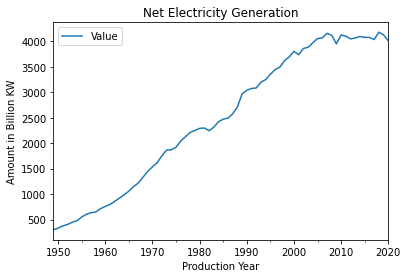

In [53]:
df_eg_tot_total.plot('Year', 'Value')     #Plotting yearly total generation

plt.xlabel("Production Year")
plt.ylabel("Amount in Billion KW")
plt.title("Net Electricity Generation")

plt.show()

c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Year'>

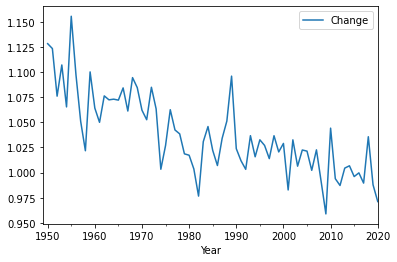

In [54]:
df_eg_tot_total['Change'] = df_eg_tot_total.Value.div(df_eg_tot_total.Value.shift())   #https://towardsdatascience.com/a-complete-guide-to-time-series-data-visualization-in-python-da0ddd2cfb01
df_eg_tot_total.plot('Year', 'Change')    #This plots the relative change observed from previous value

## 2 : What is the total monthly generation?

In [55]:
df_eg_tot

MSN     YYYYMM    Value  Column_Order  \
1983  ELETPUS 1973-01-01  160.218             4   
1984  ELETPUS 1973-02-01  143.539             4   
1985  ELETPUS 1973-03-01  148.158             4   
1986  ELETPUS 1973-04-01  139.589             4   
1987  ELETPUS 1973-05-01  147.395             4   
1988  ELETPUS 1973-06-01  161.244             4   
1989  ELETPUS 1973-07-01  173.733             4   
1990  ELETPUS 1973-08-01  177.365             4   
1991  ELETPUS 1973-09-01  156.875             4   
1992  ELETPUS 1973-10-01  154.197             4   
1993  ELETPUS 1973-11-01  148.138             4   
1994  ELETPUS 1973-12-01  153.605             4   
1996  ELETPUS 1974-01-01  157.555             4   
1997  ELETPUS 1974-02-01  142.748             4   
1998  ELETPUS 1974-03-01  150.342             4   
1999  ELETPUS 1974-04-01  142.312             4   
2000  ELETPUS 1974-05-01  153.813             4   
2001  ELETPUS 1974-06-01  156.440             4   
2002  ELETPUS 1974-07-01  178.247             4   
2003  ELETPUS 1974-08-01  174.119             4   
2004  ELETPUS 1974-09-01  152.467             4   
2005  ELETPUS 1974-10-01  152.196             4   
2006  ELETPUS 1974-11-01  150.071             4   
2007  ELETPUS 1974-12-01  160.009             4   
2009  ELETPUS 1975-01-01  164.623             4   
2010  ELETPUS 1975-02-01  147.349             4   
2011  ELETPUS 1975-03-01  155.760             4   
2012  ELETPUS 1975-04-01  146.495             4   
2013  ELETPUS 1975-05-01  153.531             4   
2014  ELETPUS 1975-06-01  162.717             4   
2015  ELETPUS 1975-07-01  177.057             4   
2016  ELETPUS 1975-08-01  179.931             4   
2017  ELETPUS 1975-09-01  155.441             4   
2018  ELETPUS 1975-10-01  155.188             4   
2019  ELETPUS 1975-11-01  153.035             4   
2020  ELETPUS 1975-12-01  169.628             4   
2022  ELETPUS 1976-01-01  178.609             4   
2023  ELETPUS 1976-02-01  156.966             4   
2024  ELETPUS 1976-03-01  164.467             4   
2025  ELETPUS 1976-04-01  153.467             4   
2026  ELETPUS 1976-05-01  157.664             4   
2027  ELETPUS 1976-06-01  173.674             4   
2028  ELETPUS 1976-07-01  186.691             4   
2029  ELETPUS 1976-08-01  186.639             4   
2030  ELETPUS 1976-09-01  165.237             4   
2031  ELETPUS 1976-10-01  164.009             4   
2032  ELETPUS 1976-11-01  169.346             4   
2033  ELETPUS 1976-12-01  184.144             4   
2035  ELETPUS 1977-01-01  196.665             4   
2036  ELETPUS 1977-02-01  162.949             4   
2037  ELETPUS 1977-03-01  169.437             4   
2038  ELETPUS 1977-04-01  157.117             4   
2039  ELETPUS 1977-05-01  169.596             4   
2040  ELETPUS 1977-06-01  181.031             4   
2041  ELETPUS 1977-07-01  199.168             4   
2042  ELETPUS 1977-08-01  196.363             4   
2043  ELETPUS 1977-09-01  176.498             4   
2044  ELETPUS 1977-10-01  166.645             4   
2045  ELETPUS 1977-11-01  167.388             4   
2046  ELETPUS 1977-12-01  184.589             4   
2048  ELETPUS 1978-01-01  198.108             4   
2049  ELETPUS 1978-02-01  173.746             4   
2050  ELETPUS 1978-03-01  173.461             4   
2051  ELETPUS 1978-04-01  160.013             4   
2052  ELETPUS 1978-05-01  175.549             4   
2053  ELETPUS 1978-06-01  188.585             4   
2054  ELETPUS 1978-07-01  202.947             4   
2055  ELETPUS 1978-08-01  206.659             4   
2056  ELETPUS 1978-09-01  185.802             4   
2057  ELETPUS 1978-10-01  176.013             4   
2058  ELETPUS 1978-11-01  176.389             4   
2059  ELETPUS 1978-12-01  192.105             4   
2061  ELETPUS 1979-01-01  209.987             4   
2062  ELETPUS 1979-02-01  186.587             4   
2063  ELETPUS 1979-03-01  183.154             4   
2064  ELETPUS 1979-04-01  170.260             4   
2065  ELETPUS 1979-05-01  178.409             4   
2066  ELETPUS 1979-06-01  186.97

In [56]:
df_eg_tot.set_index(df_eg_tot['YYYYMM'], inplace = True)

In [57]:
viz2 = df_eg_tot.groupby(df_eg_tot.index.month).sum()          #This groups all the months together and takes the sum of each group
viz2       #https://stackoverflow.com/questions/45873099/sum-up-data-by-month-in-pandas-not-year-month

Value  Column_Order
YYYYMM                         
1       13974.091           196
2       12383.291           196
3       12707.511           196
4       11825.919           196
5       12801.790           196
6       13715.045           192
7       15205.347           192
8       15119.130           192
9       13101.490           192
10      12296.467           192
11      12029.636           192
12      13279.343           192

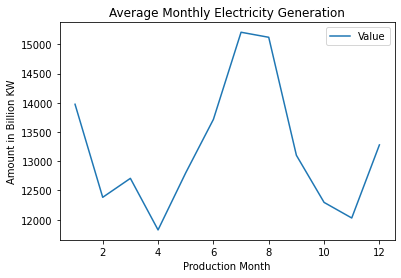

In [58]:
viz2['months'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]      #Plotting total monthly generation
viz2.plot('months', 'Value')

plt.xlabel("Production Month")
plt.ylabel("Amount in Billion KW")
plt.title("Total Monthly Electricity Generation")

plt.show()

## 3: What is the sector wise yearly generation?
## 4: Comparision of generation sector wise

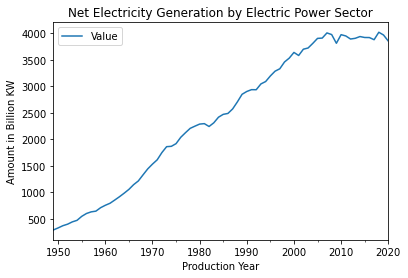

In [59]:
df_eg_eps_total = df_totals.loc[df_totals['Column_Order'] == 1]
df_eg_eps_total
df_eg_eps_total.reset_index()

df_eg_eps_total.plot('Year', 'Value')

plt.xlabel("Production Year")
plt.ylabel("Amount in Billion KW")
plt.title("Net Electricity Generation by Electric Power Sector")

plt.show()

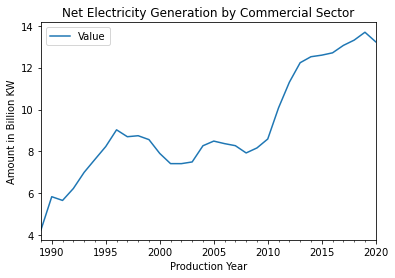

In [60]:
df_eg_cs_total = df_totals.loc[df_totals['Column_Order'] == 2]
df_eg_cs_total
df_eg_cs_total.reset_index()

df_eg_cs_total.plot('Year', 'Value')

plt.xlabel("Production Year")
plt.ylabel("Amount in Billion KW")
plt.title("Net Electricity Generation by Commercial Sector")

plt.show()

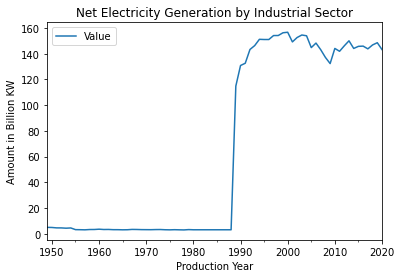

In [61]:
df_eg_is_total = df_totals.loc[df_totals['Column_Order'] == 3]
df_eg_is_total
df_eg_is_total.reset_index()

df_eg_is_total.plot('Year', 'Value')

plt.xlabel("Production Year")
plt.ylabel("Amount in Billion KW")
plt.title("Net Electricity Generation by Industrial Sector")

plt.show()

## 5: What is the sector wise monthly generation?

c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


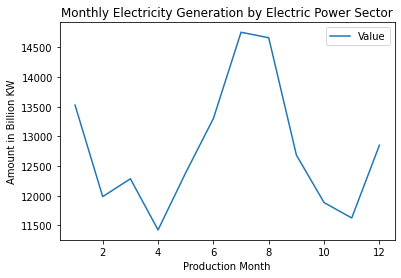

In [62]:
df_eg_eps_monthly = df_eg_eps

df_eg_eps_monthly['YYYYMM'] = pd.to_datetime(df_eg_eps_monthly['YYYYMM'], format='%Y%m')  #Converting datatypes
df_eg_eps_monthly['Value'] = df_eg_eps_monthly['Value'].astype(float)

df_eg_eps_monthly.set_index(df_eg_eps_monthly['YYYYMM'], inplace = True)     #Setting years as index

viz4_1 = df_eg_eps_monthly.groupby(df_eg_eps_monthly.index.month).sum()       #This groups and sums up each group
viz4_1

viz4_1['months'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
viz4_1.plot('months', 'Value')

plt.xlabel("Production Month")
plt.ylabel("Amount in Billion KW")
plt.title("Monthly Electricity Generation by Electric Power Sector")

plt.show()

c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


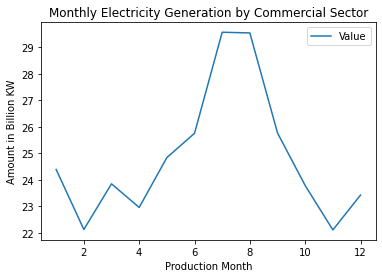

In [63]:
df_eg_cs_monthly = df_eg_cs

df_eg_cs_monthly['YYYYMM'] = pd.to_datetime(df_eg_cs_monthly['YYYYMM'], format='%Y%m')    #Converting datatypes
df_eg_cs_monthly['Value'] = df_eg_cs_monthly['Value'].astype(float)

df_eg_cs_monthly.set_index(df_eg_cs_monthly['YYYYMM'], inplace = True)     #Setting years as index

viz4_2 = df_eg_cs_monthly.groupby(df_eg_cs_monthly.index.month).sum()         #This groups and sums up each group
viz4_2

viz4_2['months'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
viz4_2.plot('months', 'Value')

plt.xlabel("Production Month")
plt.ylabel("Amount in Billion KW")
plt.title("Monthly Electricity Generation by Commercial Sector")

plt.show()

c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


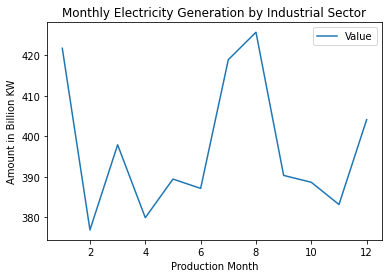

In [64]:
df_eg_is_monthly = df_eg_is

df_eg_is_monthly['YYYYMM'] = pd.to_datetime(df_eg_is_monthly['YYYYMM'], format='%Y%m')    #Converting datatypes
df_eg_is_monthly['Value'] = df_eg_is_monthly['Value'].astype(float)

df_eg_is_monthly.set_index(df_eg_is_monthly['YYYYMM'], inplace = True)          #Setting years as index

viz4_3 = df_eg_is_monthly.groupby(df_eg_is_monthly.index.month).sum()       #This groups and sums up each group
viz4_3

viz4_3['months'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
viz4_3.plot('months', 'Value')

plt.xlabel("Production Month")
plt.ylabel("Amount in Billion KW")
plt.title("Monthly Electricity Generation by Industrial Sector")

plt.show()

## 6 : What are the yearly imports?

In [65]:
df_imports_total = df_totals.loc[df_totals['Column_Order'] == 5]     #Locating the Imports data from master df
df_imports_total
df_imports_total.reset_index()

index      MSN   Value  Column_Order          Description  \
0    2612  ELIMPUS   1.764             5  Electricity Imports   
1    2613  ELIMPUS   1.933             5  Electricity Imports   
2    2614  ELIMPUS   2.387             5  Electricity Imports   
3    2615  ELIMPUS   2.506             5  Electricity Imports   
4    2616  ELIMPUS   2.437             5  Electricity Imports   
5    2617  ELIMPUS   2.688             5  Electricity Imports   
6    2618  ELIMPUS   4.567             5  Electricity Imports   
7    2619  ELIMPUS   5.179             5  Electricity Imports   
8    2620  ELIMPUS   4.856             5  Electricity Imports   
9    2621  ELIMPUS   4.078             5  Electricity Imports   
10   2622  ELIMPUS   4.393             5  Electricity Imports   
11   2623  ELIMPUS   5.323             5  Electricity Imports   
12   2624  ELIMPUS   3.170             5  Electricity Imports   
13   2625  ELIMPUS   2.197             5  Electricity Imports   
14   2626  ELIMPUS   2.083             5  Electricity Imports   
15   2627  ELIMPUS   6.209             5  Electricity Imports   
16   2628  ELIMPUS   3.558             5  Electricity Imports   
17   2629  ELIMPUS   4.268             5  Electricity Imports   
18   2630  ELIMPUS   4.051             5  Electricity Imports   
19   2631  ELIMPUS   3.654             5  Electricity Imports   
20   2632  ELIMPUS   4.902             5  Electricity Imports   
21   2633  ELIMPUS   6.170             5  Electricity Imports   
22   2634  ELIMPUS   7.044             5  Electricity Imports   
23   2635  ELIMPUS  10.495             5  Electricity Imports   
24   2648  ELIMPUS  16.848             5  Electricity Imports   
25   2661  ELIMPUS  15.420             5  Electricity Imports   
26   2674  ELIMPUS  11.268             5  Electricity Imports   
27   2687  ELIMPUS  10.988             5  Electricity Imports   
28   2700  ELIMPUS  20.159             5  Electricity Imports   
29   2713  ELIMPUS  21.208             5  Electricity Imports   
30   2726  ELIMPUS  22.516             5  Electricity Imports   
31   2739  ELIMPUS  25.021             5  Electricity Imports   
32   2752  ELIMPUS  36.298             5  Electricity Imports   
33   2765  ELIMPUS  32.852             5  Electricity Imports   
34   2778  ELIMPUS  38.668             5  Electricity Imports   
35   2791  ELIMPUS  42.219             5  Electricity Imports   
36   2804  ELIMPUS  45.895             5  Electricity Imports   
37   2817  ELIMPUS  40.713             5  Electricity Imports   
38   2830  ELIMPUS  52.219             5  Electricity Imports   
39   2843  ELIMPUS  38.837             5  Electricity Imports   
40   2856  ELIMPUS  26.110             5  Electricity Imports   
41   2869  ELIMPUS  18.445             5  Electricity Imports   
42   2882  ELIMPUS  21.931             5  Electricity Imports   
43   2895  ELIMPUS  28.247             5  Electricity Imports   
44   2908  ELIMPUS  31.358             5  Electricity Imports   
45   2921  ELIMPUS  46.833             5  Electricity Imports   
46   2934  ELIMPUS  42.854             5  Electricity Imports   
47   2947  ELIMPUS  43.497             5  Electricity Imports   
48   2960  ELIMPUS  43.031             5  Electricity Imports   
49   2973  ELIMPUS  39.513             5  Electricity Imports   
50   2986  ELIMPUS  43.215             5  Electricity Imports   
51   2999  ELIMPUS  48.592             5  Electricity Imports   
52   3012  ELIMPUS  38.500             5  Electricity Imports   
53   3025  ELIMPUS  36.779             5  Electricity Imports   
54   3038  ELIMPUS  30.395             5  Electricity Imports   
55   3051  ELIMPUS  34.210             5  Electricity Imports   
56   3064  ELIMPUS  43.929             5  Electricity Imports   
57   3077  ELIMPUS  42.691             5  Electricity Imports   
58   3090  ELIMPUS  51.396             5  Electricity Imports   
59   3103  ELIMPUS  57.019             5  Electricity Imports   
60   3116  ELIMPUS  52.191             

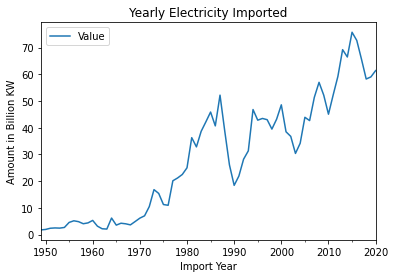

In [66]:
df_imports_total.plot('Year', 'Value')

plt.xlabel("Import Year")
plt.ylabel("Amount in Billion KW")
plt.title("Yearly Electricity Imported")

plt.show()

c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Year'>

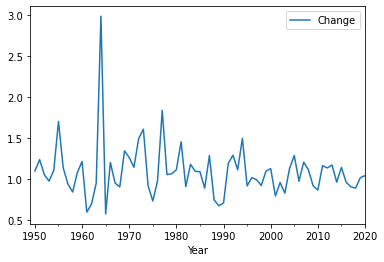

In [67]:
df_imports_total['Change'] = df_imports_total.Value.div(df_imports_total.Value.shift())
df_imports_total.plot('Year', 'Change')

## 7 : What are the yearly exports?

In [68]:
df_exports_total = df_totals.loc[df_totals['Column_Order'] == 6]        #Locating the Exports data from master df
df_exports_total
df_exports_total.reset_index()

index      MSN   Value  Column_Order          Description  \
0    3265  ELEXPUS   0.175             6  Electricity Exports   
1    3266  ELEXPUS   0.147             6  Electricity Exports   
2    3267  ELEXPUS   0.200             6  Electricity Exports   
3    3268  ELEXPUS   0.237             6  Electricity Exports   
4    3269  ELEXPUS   0.429             6  Electricity Exports   
5    3270  ELEXPUS   0.348             6  Electricity Exports   
6    3271  ELEXPUS   0.500             6  Electricity Exports   
7    3272  ELEXPUS   0.631             6  Electricity Exports   
8    3273  ELEXPUS   1.254             6  Electricity Exports   
9    3274  ELEXPUS   0.760             6  Electricity Exports   
10   3275  ELEXPUS   0.838             6  Electricity Exports   
11   3276  ELEXPUS   0.788             6  Electricity Exports   
12   3277  ELEXPUS   0.917             6  Electricity Exports   
13   3278  ELEXPUS   1.661             6  Electricity Exports   
14   3279  ELEXPUS   1.985             6  Electricity Exports   
15   3280  ELEXPUS   4.253             6  Electricity Exports   
16   3281  ELEXPUS   3.699             6  Electricity Exports   
17   3282  ELEXPUS   3.176             6  Electricity Exports   
18   3283  ELEXPUS   4.350             6  Electricity Exports   
19   3284  ELEXPUS   4.285             6  Electricity Exports   
20   3285  ELEXPUS   3.830             6  Electricity Exports   
21   3286  ELEXPUS   4.209             6  Electricity Exports   
22   3287  ELEXPUS   3.514             6  Electricity Exports   
23   3288  ELEXPUS   2.809             6  Electricity Exports   
24   3301  ELEXPUS   2.570             6  Electricity Exports   
25   3314  ELEXPUS   2.726             6  Electricity Exports   
26   3327  ELEXPUS   5.083             6  Electricity Exports   
27   3340  ELEXPUS   2.378             6  Electricity Exports   
28   3353  ELEXPUS   2.744             6  Electricity Exports   
29   3366  ELEXPUS   1.478             6  Electricity Exports   
30   3379  ELEXPUS   2.182             6  Electricity Exports   
31   3392  ELEXPUS   4.096             6  Electricity Exports   
32   3405  ELEXPUS   3.060             6  Electricity Exports   
33   3418  ELEXPUS   3.536             6  Electricity Exports   
34   3431  ELEXPUS   3.337             6  Electricity Exports   
35   3444  ELEXPUS   2.558             6  Electricity Exports   
36   3457  ELEXPUS   4.965             6  Electricity Exports   
37   3470  ELEXPUS   4.816             6  Electricity Exports   
38   3483  ELEXPUS   5.882             6  Electricity Exports   
39   3496  ELEXPUS   7.067             6  Electricity Exports   
40   3509  ELEXPUS  15.135             6  Electricity Exports   
41   3522  ELEXPUS  16.134             6  Electricity Exports   
42   3535  ELEXPUS   2.305             6  Electricity Exports   
43   3548  ELEXPUS   2.827             6  Electricity Exports   
44   3561  ELEXPUS   3.541             6  Electricity Exports   
45   3574  ELEXPUS   2.010             6  Electricity Exports   
46   3587  ELEXPUS   3.623             6  Electricity Exports   
47   3600  ELEXPUS   3.302             6  Electricity Exports   
48   3613  ELEXPUS   8.974             6  Electricity Exports   
49   3626  ELEXPUS  13.656             6  Electricity Exports   
50   3639  ELEXPUS  14.222             6  Electricity Exports   
51   3652  ELEXPUS  14.829             6  Electricity Exports   
52   3665  ELEXPUS  16.473             6  Electricity Exports   
53   3678  ELEXPUS  15.796             6  Electricity Exports   
54   3691  ELEXPUS  23.975             6  Electricity Exports   
55   3704  ELEXPUS  22.898             6  Electricity Exports   
56   3717  ELEXPUS  19.151             6  Electricity Exports   
57   3730  ELEXPUS  24.271             6  Electricity Exports   
58   3743  ELEXPUS  20.144             6  Electricity Exports   
59   3756  ELEXPUS  24.198             6  Electricity Exports   
60   3769  ELEXPUS  18.138             

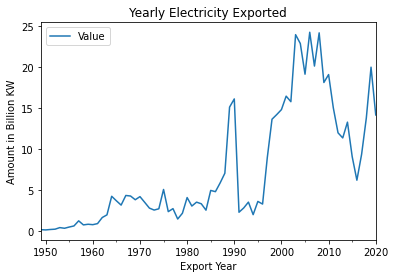

In [69]:
df_exports_total.plot('Year', 'Value')

plt.xlabel("Export Year")
plt.ylabel("Amount in Billion KW")
plt.title("Yearly Electricity Exported")

plt.show()

c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Year'>

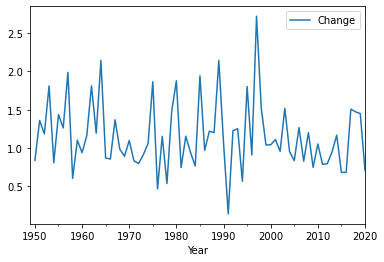

In [70]:
df_exports_total['Change'] = df_exports_total.Value.div(df_exports_total.Value.shift())
df_exports_total.plot('Year', 'Change')

## 9 : What are the yearly transmission and distribution losses unaccounted for?

In [71]:
df_losses_total = df_totals.loc[df_totals['Column_Order'] == 8]     #Locating the yearly transmission and distribution losses data from master df
df_losses_total
df_losses_total.reset_index()

index      MSN    Value  Column_Order  \
0    4571  ELUNPUS   43.201             8   
1    4572  ELUNPUS   44.430             8   
2    4573  ELUNPUS   47.201             8   
3    4574  ELUNPUS   49.934             8   
4    4575  ELUNPUS   52.840             8   
5    4576  ELUNPUS   54.434             8   
6    4577  ELUNPUS   57.618             8   
7    4578  ELUNPUS   62.144             8   
8    4579  ELUNPUS   62.424             8   
9    4580  ELUNPUS   63.906             8   
10   4581  ELUNPUS   70.045             8   
11   4582  ELUNPUS   75.616             8   
12   4583  ELUNPUS   77.428             8   
13   4584  ELUNPUS   80.880             8   
14   4585  ELUNPUS   87.513             8   
15   4586  ELUNPUS   93.115             8   
16   4587  ELUNPUS  104.455             8   
17   4588  ELUNPUS  113.479             8   
18   4589  ELUNPUS  118.279             8   
19   4590  ELUNPUS  129.324             8   
20   4591  ELUNPUS  132.696             8   
21   4592  ELUNPUS  144.772             8   
22   4593  ELUNPUS  149.844             8   
23   4594  ELUNPUS  165.504             8   
24   4607  ELUNPUS  165.426             8   
25   4620  ELUNPUS  177.089             8   
26   4633  ELUNPUS  179.849             8   
27   4646  ELUNPUS  194.278             8   
28   4659  ELUNPUS  196.502             8   
29   4672  ELUNPUS  211.185             8   
30   4685  ELUNPUS  199.900             8   
31   4698  ELUNPUS  216.077             8   
32   4711  ELUNPUS  184.108             8   
33   4724  ELUNPUS  187.247             8   
34   4737  ELUNPUS  197.821             8   
35   4750  ELUNPUS  173.330             8   
36   4763  ELUNPUS  189.959             8   
37   4776  ELUNPUS  157.615             8   
38   4789  ELUNPUS  164.352             8   
39   4802  ELUNPUS  161.119             8   
40   4815  ELUNPUS  222.487             8   
41   4828  ELUNPUS  203.056             8   
42   4841  ELUNPUS  207.365             8   
43   4854  ELUNPUS  212.096             8   
44   4867  ELUNPUS  224.308             8   
45   4880  ELUNPUS  211.457             8   
46   4893  ELUNPUS  228.755             8   
47   4906  ELUNPUS  230.617             8   
48   4919  ELUNPUS  224.380             8   
49   4932  ELUNPUS  221.056             8   
50   4945  ELUNPUS  240.086             8   
51   4958  ELUNPUS  243.511             8   
52   4971  ELUNPUS  201.564             8   
53   4984  ELUNPUS  247.785             8   
54   4997  ELUNPUS  227.576             8   
55   5010  ELUNPUS  265.918             8   
56   5023  ELUNPUS  269.217             8   
57   5036  ELUNPUS  266.277             8   
58   5049  ELUNPUS  297.766             8   
59   5062  ELUNPUS  286.048             8   
60   5075  ELUNPUS  260.650             8   
61   5088  ELUNPUS  264.285             8   
62   5101  ELUNPUS  254.792             8   
63   5114  ELUNPUS  262.720             8   
64   5127  ELUNPUS  255.510             8   
65   5140  ELUNPUS  243.544             8   
66   5153  ELUNPUS  244.112             8   
67   5166  ELUNPUS  240.871             8   
68   5179  ELUNPUS  226.114             8   
69   5192  ELUNPUS  219.434             8   
70   5205  ELUNPUS  212.291             8   
71   5218  ELUNPUS  254.227             8   

                                          Description                   Unit  \
0   Transmission and Distribution Losses and Unacc...  Billion Kilowatthours   
1   Transmission and Distribution Losses and Unacc...  Billion Kilowatthours   
2   Transmission and Distribution Losses and Unacc...  Billion Kilowatthours   
3   Transmission and Distribution Losses and Unacc...  Billion Kilowatthours   
4   Transmission and Distribution Losses and Unacc...  Billion Kilowatthours   
5   Transmission and Distribution Losses and Unacc...  Billion Kilowatthours   
6   Transmission and Distribution Losses and Unacc...  Billion Kilowatthours   
7   Transmission and Distribution Losses and Unacc...  Billion Kilowatthours  

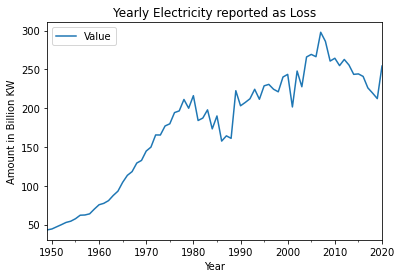

In [72]:
df_losses_total.plot('Year', 'Value')

plt.xlabel("Year")
plt.ylabel("Amount in Billion KW")
plt.title("Yearly Electricity reported as Loss")

plt.show()

c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Year'>

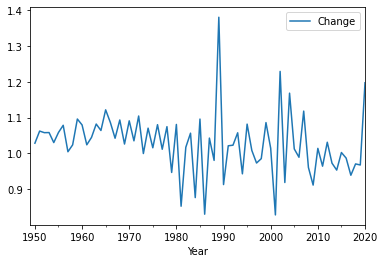

In [73]:
df_losses_total['Change'] = df_losses_total.Value.div(df_losses_total.Value.shift())
df_losses_total.plot('Year', 'Change')

## 10 : What are the yearly retail sales?

In [74]:
df_rsales_total = df_totals.loc[df_totals['Column_Order'] == 9]         #Locating the retail sales data from master df
df_rsales_total
df_rsales_total.reset_index()

index      MSN     Value  Column_Order                      Description  \
0    5224  ESTCPUS   254.511             9  Electricity Retail Sales, Total   
1    5225  ESTCPUS   291.443             9  Electricity Retail Sales, Total   
2    5226  ESTCPUS   330.285             9  Electricity Retail Sales, Total   
3    5227  ESTCPUS   356.164             9  Electricity Retail Sales, Total   
4    5228  ESTCPUS   396.217             9  Electricity Retail Sales, Total   
5    5229  ESTCPUS   424.164             9  Electricity Retail Sales, Total   
6    5230  ESTCPUS   496.748             9  Electricity Retail Sales, Total   
7    5231  ESTCPUS   546.280             9  Electricity Retail Sales, Total   
8    5232  ESTCPUS   575.820             9  Electricity Retail Sales, Total   
9    5233  ESTCPUS   587.863             9  Electricity Retail Sales, Total   
10   5234  ESTCPUS   646.888             9  Electricity Retail Sales, Total   
11   5235  ESTCPUS   688.075             9  Electricity Retail Sales, Total   
12   5236  ESTCPUS   721.950             9  Electricity Retail Sales, Total   
13   5237  ESTCPUS   777.600             9  Electricity Retail Sales, Total   
14   5238  ESTCPUS   832.613             9  Electricity Retail Sales, Total   
15   5239  ESTCPUS   896.059             9  Electricity Retail Sales, Total   
16   5240  ESTCPUS   953.789             9  Electricity Retail Sales, Total   
17   5241  ESTCPUS  1035.145             9  Electricity Retail Sales, Total   
18   5242  ESTCPUS  1099.217             9  Electricity Retail Sales, Total   
19   5243  ESTCPUS  1202.871             9  Electricity Retail Sales, Total   
20   5244  ESTCPUS  1313.833             9  Electricity Retail Sales, Total   
21   5245  ESTCPUS  1392.300             9  Electricity Retail Sales, Total   
22   5246  ESTCPUS  1469.540             9  Electricity Retail Sales, Total   
23   5247  ESTCPUS  1595.161             9  Electricity Retail Sales, Total   
24   5260  ESTCPUS  1712.909             9  Electricity Retail Sales, Total   
25   5273  ESTCPUS  1705.924             9  Electricity Retail Sales, Total   
26   5286  ESTCPUS  1747.091             9  Electricity Retail Sales, Total   
27   5299  ESTCPUS  1855.246             9  Electricity Retail Sales, Total   
28   5312  ESTCPUS  1948.361             9  Electricity Retail Sales, Total   
29   5325  ESTCPUS  2017.922             9  Electricity Retail Sales, Total   
30   5338  ESTCPUS  2071.099             9  Electricity Retail Sales, Total   
31   5351  ESTCPUS  2094.449             9  Electricity Retail Sales, Total   
32   5364  ESTCPUS  2147.103             9  Electricity Retail Sales, Total   
33   5377  ESTCPUS  2086.441             9  Electricity Retail Sales, Total   
34   5390  ESTCPUS  2150.955             9  Electricity Retail Sales, Total   
35   5403  ESTCPUS  2285.796             9  Electricity Retail Sales, Total   
36   5416  ESTCPUS  2323.974             9  Electricity Retail Sales, Total   
37   5429  ESTCPUS  2368.753             9  Electricity Retail Sales, Total   
38   5442  ESTCPUS  2457.272             9  Electricity Retail Sales, Total   
39   5455  ESTCPUS  2578.062             9  Electricity Retail Sales, Total   
40   5468  ESTCPUS  2646.809             9  Electricity Retail Sales, Total   
41   5481  ESTCPUS  2712.555             9  Electricity Retail Sales, Total   
42   5494  ESTCPUS  2762.003             9  Electricity Retail Sales, Total   
43   5507  ESTCPUS  2763.365             9  Electricity Retail Sales, Total   
44   5520  ESTCPUS  2861.462             9  Electricity Retail Sales, Total   
45   5533  ESTCPUS  2934.563             9  Electricity Retail Sales, Total   
46   5546  ESTCPUS  3013.287             9  Electricity Retail Sales, Total   
47   5559  ESTCPUS  3101.127             9  Electricity Retail Sales, Total   
48   5572  ESTCPUS  3145.610             9  Electricity Retail Sales, Total   
49   5585  ESTCPUS  3264.231             9  Electricit

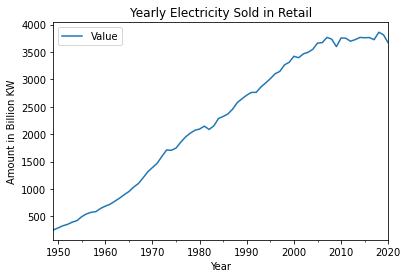

In [75]:
df_rsales_total.plot('Year', 'Value')

plt.xlabel("Year")
plt.ylabel("Amount in Billion KW")
plt.title("Yearly Electricity Sold in Retail")

plt.show()      #There is a direct relation between generation and retail sales

c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Year'>

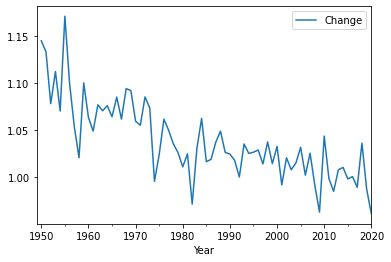

In [76]:
df_rsales_total['Change'] = df_rsales_total.Value.div(df_rsales_total.Value.shift())
df_rsales_total.plot('Year', 'Change')

## 11 : How much is the yearly direct use?

In [77]:
df_duse_total = df_totals.loc[df_totals['Column_Order'] == 10]       #Locating the direct use data from master df
df_duse_total
df_duse_total.reset_index()

index      MSN    Value  Column_Order             Description  \
0    6121  ELDUPUS  108.826            10  Electricity Direct Use   
1    6134  ELDUPUS  124.529            10  Electricity Direct Use   
2    6147  ELDUPUS  124.057            10  Electricity Direct Use   
3    6160  ELDUPUS  133.841            10  Electricity Direct Use   
4    6173  ELDUPUS  139.238            10  Electricity Direct Use   
5    6186  ELDUPUS  146.325            10  Electricity Direct Use   
6    6199  ELDUPUS  150.677            10  Electricity Direct Use   
7    6212  ELDUPUS  152.638            10  Electricity Direct Use   
8    6225  ELDUPUS  156.239            10  Electricity Direct Use   
9    6238  ELDUPUS  160.866            10  Electricity Direct Use   
10   6251  ELDUPUS  171.629            10  Electricity Direct Use   
11   6264  ELDUPUS  170.943            10  Electricity Direct Use   
12   6277  ELDUPUS  162.649            10  Electricity Direct Use   
13   6290  ELDUPUS  166.184            10  Electricity Direct Use   
14   6303  ELDUPUS  168.295            10  Electricity Direct Use   
15   6316  ELDUPUS  168.470            10  Electricity Direct Use   
16   6329  ELDUPUS  150.016            10  Electricity Direct Use   
17   6342  ELDUPUS  146.927            10  Electricity Direct Use   
18   6355  ELDUPUS  125.670            10  Electricity Direct Use   
19   6368  ELDUPUS  132.197            10  Electricity Direct Use   
20   6381  ELDUPUS  126.938            10  Electricity Direct Use   
21   6394  ELDUPUS  131.910            10  Electricity Direct Use   
22   6407  ELDUPUS  132.754            10  Electricity Direct Use   
23   6420  ELDUPUS  137.657            10  Electricity Direct Use   
24   6433  ELDUPUS  143.462            10  Electricity Direct Use   
25   6446  ELDUPUS  138.574            10  Electricity Direct Use   
26   6459  ELDUPUS  141.168            10  Electricity Direct Use   
27   6472  ELDUPUS  139.844            10  Electricity Direct Use   
28   6485  ELDUPUS  141.114            10  Electricity Direct Use   
29   6498  ELDUPUS  144.114            10  Electricity Direct Use   
30   6511  ELDUPUS  143.458            10  Electricity Direct Use   
31   6524  ELDUPUS  138.351            10  Electricity Direct Use   

                     Unit       Year  
0   Billion Kilowatthours 1989-01-01  
1   Billion Kilowatthours 1990-01-01  
2   Billion Kilowatthours 1991-01-01  
3   Billion Kilowatthours 1992-01-01  
4   Billion Kilowatthours 1993-01-01  
5   Billion Kilowatthours 1994-01-01  
6   Billion Kilowatthours 1995-01-01  
7   Billion Kilowatthours 1996-01-01  
8   Billion Kilowatthours 1997-01-01  
9   Billion Kilowatthours 1998-01-01  
10  Billion Kilowatthours 1999-01-01  
11  Billion Kilowatthours 2000-01-01  
12  Billion Kilowatthours 2001-01-01  
13  Billion Kilowatthours 2002-01-01  
14  Billion Kilowatthours 2003-01-01  
15  Billion Kilowatthours 2004-01-01  
16  Billion Kilowatthours 2005-01-01  
17  Billion Kilowatthours 2006-01-01  
18  Billion Kilowatthours 2007-01-01  
19  Billion Kilowatthours 2008-01-01  
20  Billion Kilowatthours 2009-01-01  
21  Billion Kilowatthours 2010-01-01  
22  Billion Kilowatthours 2011-01-01  
23  Billion Kilowatthours 2012-01-01  
24  Billion Kilowatthours 2013-01-01  
25  Billion Kilowatthours 2014-01-01  
26  Billion Kilowatthours 2015-01-01  
27  Billion Kilowatthours 2016-01-01  
28  Billion Kilowatthours 2017-01-01  
29  Billion Kilowatthours 2018-01-01  
30  Billion Kilowatthours 2019-01-01  
31  Billion Kilowatthours 2020-01-01

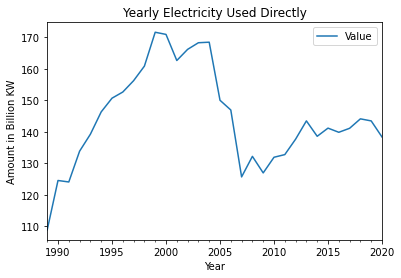

In [78]:
df_duse_total.plot('Year', 'Value')                  #There is a gradual decrease in duse later because of commercialization and industrialization

plt.xlabel("Year")
plt.ylabel("Amount in Billion KW")
plt.title("Yearly Electricity Used Directly")

plt.show()            #The amount is very small compared to retail

c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Year'>

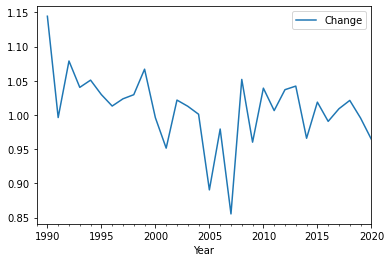

In [79]:
df_duse_total['Change'] = df_duse_total.Value.div(df_duse_total.Value.shift())
df_duse_total.plot('Year', 'Change')

## 12 : How much is the yearly total end use?

In [80]:
df_euse_total = df_totals.loc[df_totals['Column_Order'] == 11]            #Locating the total use data from master df
df_euse_total
df_euse_total.reset_index()

index      MSN     Value  Column_Order                 Description  \
0    6530  ELTCPUS   254.511            11  Electricity End Use, Total   
1    6531  ELTCPUS   291.443            11  Electricity End Use, Total   
2    6532  ELTCPUS   330.285            11  Electricity End Use, Total   
3    6533  ELTCPUS   356.164            11  Electricity End Use, Total   
4    6534  ELTCPUS   396.217            11  Electricity End Use, Total   
5    6535  ELTCPUS   424.164            11  Electricity End Use, Total   
6    6536  ELTCPUS   496.748            11  Electricity End Use, Total   
7    6537  ELTCPUS   546.280            11  Electricity End Use, Total   
8    6538  ELTCPUS   575.820            11  Electricity End Use, Total   
9    6539  ELTCPUS   587.863            11  Electricity End Use, Total   
10   6540  ELTCPUS   646.888            11  Electricity End Use, Total   
11   6541  ELTCPUS   688.075            11  Electricity End Use, Total   
12   6542  ELTCPUS   721.950            11  Electricity End Use, Total   
13   6543  ELTCPUS   777.600            11  Electricity End Use, Total   
14   6544  ELTCPUS   832.613            11  Electricity End Use, Total   
15   6545  ELTCPUS   896.059            11  Electricity End Use, Total   
16   6546  ELTCPUS   953.789            11  Electricity End Use, Total   
17   6547  ELTCPUS  1035.145            11  Electricity End Use, Total   
18   6548  ELTCPUS  1099.217            11  Electricity End Use, Total   
19   6549  ELTCPUS  1202.871            11  Electricity End Use, Total   
20   6550  ELTCPUS  1313.833            11  Electricity End Use, Total   
21   6551  ELTCPUS  1392.300            11  Electricity End Use, Total   
22   6552  ELTCPUS  1469.540            11  Electricity End Use, Total   
23   6553  ELTCPUS  1595.161            11  Electricity End Use, Total   
24   6566  ELTCPUS  1712.909            11  Electricity End Use, Total   
25   6579  ELTCPUS  1705.924            11  Electricity End Use, Total   
26   6592  ELTCPUS  1747.091            11  Electricity End Use, Total   
27   6605  ELTCPUS  1855.246            11  Electricity End Use, Total   
28   6618  ELTCPUS  1948.361            11  Electricity End Use, Total   
29   6631  ELTCPUS  2017.922            11  Electricity End Use, Total   
30   6644  ELTCPUS  2071.099            11  Electricity End Use, Total   
31   6657  ELTCPUS  2094.449            11  Electricity End Use, Total   
32   6670  ELTCPUS  2147.103            11  Electricity End Use, Total   
33   6683  ELTCPUS  2086.441            11  Electricity End Use, Total   
34   6696  ELTCPUS  2150.955            11  Electricity End Use, Total   
35   6709  ELTCPUS  2285.796            11  Electricity End Use, Total   
36   6722  ELTCPUS  2323.974            11  Electricity End Use, Total   
37   6735  ELTCPUS  2368.753            11  Electricity End Use, Total   
38   6748  ELTCPUS  2457.272            11  Electricity End Use, Total   
39   6761  ELTCPUS  2578.062            11  Electricity End Use, Total   
40   6774  ELTCPUS  2755.635            11  Electricity End Use, Total   
41   6787  ELTCPUS  2837.084            11  Electricity End Use, Total   
42   6800  ELTCPUS  2886.060            11  Electricity End Use, Total   
43   6813  ELTCPUS  2897.207            11  Electricity End Use, Total   
44   6826  ELTCPUS  3000.700            11  Electricity End Use, Total   
45   6839  ELTCPUS  3080.888            11  Electricity End Use, Total   
46   6852  ELTCPUS  3163.963            11  Electricity End Use, Total   
47   6865  ELTCPUS  3253.765            11  Electricity End Use, Total   
48   6878  ELTCPUS  3301.849            11  Electricity End Use, Total   
49   6891  ELTCPUS  3425.097            11  Electricity End Use, Total   
50   6904  ELTCPUS  3483.716            11  Electricity End Use, Total   
51   6917  ELTCPUS  3592.357            11  Electricity End Use, Total   
52   6930  ELTCPUS  3557.107            11  Electricity End Use, Total   
53   694

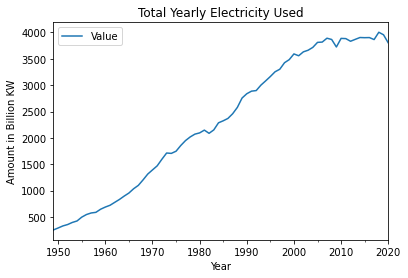

In [81]:
df_euse_total.plot('Year', 'Value')                  

plt.xlabel("Year")
plt.ylabel("Amount in Billion KW")
plt.title("Total Yearly Electricity Used")

plt.show()

c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Year'>

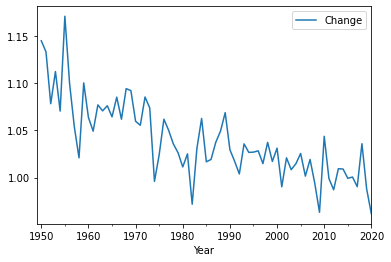

In [82]:
df_euse_total['Change'] = df_euse_total.Value.div(df_euse_total.Value.shift())
df_euse_total.plot('Year', 'Change')

### Relation to oil crisis?
### Feb 2021 Texas Blackout?
### Later stability due to environmentalists?

References:
1. https://thispointer.com/python-pandas-how-to-display-full-dataframe-i-e-print-all-rows-columns-without-truncation/
2. https://datatofish.com/integers-datetime-pandas-dataframe/
3. https://towardsdatascience.com/a-complete-guide-to-time-series-data-visualization-in-python-da0ddd2cfb01